# Pandas

In the previous chapter, we dive into detail on NumPy and its ``ndarray`` object, which provides efficient storage and manipulation of dense typed arrays in Python.
Here we'll build on this knowledge by looking in detail at the data structures provided by the Pandas library.
Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a ``DataFrame``.
``DataFrame``s are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data.
As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

As we saw, NumPy's ``ndarray`` data structure provides essential features for the type of clean, well-organized data typically seen in numerical computing tasks.
While it serves this purpose very well, its limitations become clear when we need more flexibility (e.g., attaching labels to data, working with missing data, etc.) and when attempting operations that do not map well to element-wise broadcasting (e.g., groupings, pivots, etc.), each of which is an important piece of analyzing the less structured data available in many forms in the world around us.
Pandas, and in particular its ``Series`` and ``DataFrame`` objects, builds on the NumPy array structure and provides efficient access to these sorts of "data munging" tasks that occupy much of a data scientist's time.

In this chapter, we will focus on the mechanics of using ``Series``, ``DataFrame``, and related structures effectively.
We will use examples drawn from real datasets where appropriate, but these examples are not necessarily the focus.

## Installing and Using Pandas

Installation of Pandas on your system requires NumPy to be installed, and if building the library from source, requires the appropriate tools to compile the C and Cython sources on which Pandas is built.
Details on this installation can be found in the [Pandas documentation](http://pandas.pydata.org/).

Once Pandas is installed, you can import it and check the version:

In [2]:
import pandas
pandas.__version__

'2.2.3'

Just as we generally import NumPy under the alias ``np``, we will import Pandas under the alias ``pd``:

In [3]:
import pandas as pd
import numpy as np
rng = np.random.RandomState(42)

# Introducing Pandas Objects

At the very basic level, Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices.
As we will see during the course of this chapter, Pandas provides a host of useful tools, methods, and functionality on top of the basic data structures, but nearly everything that follows will require an understanding of what these structures are.
Thus, before we go any further, let's introduce these three fundamental Pandas data structures: the ``Series``, ``DataFrame``, and ``Index``.

We will start our code sessions with the standard NumPy and Pandas imports:

## The Pandas Series Object

A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

In [4]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

As we see in the output, the ``Series`` wraps both a sequence of values and a sequence of indices, which we can access with the ``values`` and ``index`` attributes.
The ``values`` are simply a familiar NumPy array:

In [5]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

The ``index`` is an array-like object of type ``pd.Index``, which we'll discuss in more detail momentarily.

In [7]:
data.index

RangeIndex(start=0, stop=4, step=1)

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [8]:
data[1]

0.5

In [9]:
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [10]:
data[1:3]

1    0.50
2    0.75
dtype: float64

As we will see, though, the Pandas ``Series`` is much more general and flexible than the one-dimensional NumPy array that it emulates.

### ``Series`` as generalized NumPy array

From what we've seen so far, it may look like the ``Series`` object is basically interchangeable with a one-dimensional NumPy array.
The essential difference is the presence of the index: while the Numpy Array has an *implicitly defined* integer index used to access the values, the Pandas ``Series`` has an *explicitly defined* index associated with the values.

This explicit index definition gives the ``Series`` object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type.
For example, if we wish, we can use strings as an index:

In [11]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

And the item access works as expected:

In [12]:
data['b']

0.5

We can even use non-contiguous or non-sequential indices:

In [13]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [14]:
data[5]

0.5

### Series as specialized dictionary

In this way, you can think of a Pandas ``Series`` a bit like a specialization of a Python dictionary.
A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a ``Series`` is a structure which maps typed keys to a set of typed values.
This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas ``Series`` makes it much more efficient than Python dictionaries for certain operations.

The ``Series``-as-dictionary analogy can be made even more clear by constructing a ``Series`` object directly from a Python dictionary:

In [15]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

By default, a ``Series`` will be created where the index is drawn from the sorted keys.
From here, typical dictionary-style item access can be performed:

In [16]:
population['California']

38332521

Unlike a dictionary, though, the ``Series`` also supports array-style operations such as slicing:

In [17]:
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [19]:
population['California':'New York']

California    38332521
Texas         26448193
New York      19651127
dtype: int64

### Constructing Series objects

We've already seen a few ways of constructing a Pandas ``Series`` from scratch; all of them are some version of the following:

```python
>>> pd.Series(data, index=index)
```

where ``index`` is an optional argument, and ``data`` can be one of many entities.

For example, ``data`` can be a list or NumPy array, in which case ``index`` defaults to an integer sequence:

In [20]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

``data`` can be a scalar, which is repeated to fill the specified index:

In [21]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

``data`` can be a dictionary, in which ``index`` defaults to the sorted dictionary keys:

In [22]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In each case, the index can be explicitly set if a different result is preferred:

In [23]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

Notice that in this case, the ``Series`` is populated only with the explicitly identified keys.

## The Pandas DataFrame Object

The next fundamental structure in Pandas is the ``DataFrame``.
Like the ``Series`` object discussed in the previous section, the ``DataFrame`` can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.
We'll now take a look at each of these perspectives.

### DataFrame as a generalized NumPy array
If a ``Series`` is an analog of a one-dimensional array with flexible indices, a ``DataFrame`` is an analog of a two-dimensional array with both flexible row indices and flexible column names.
Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a ``DataFrame`` as a sequence of aligned ``Series`` objects.
Here, by "aligned" we mean that they share the same index.

To demonstrate this, let's first construct a new ``Series`` listing the area of each of the five states discussed in the previous section:

In [24]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

Now that we have this along with the ``population`` Series from before, we can use a dictionary to construct a single two-dimensional object containing this information:

In [25]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


Like the ``Series`` object, the ``DataFrame`` has an ``index`` attribute that gives access to the index labels:

In [26]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Additionally, the ``DataFrame`` has a ``columns`` attribute, which is an ``Index`` object holding the column labels:

In [27]:
states.columns

Index(['population', 'area'], dtype='object')

Thus the ``DataFrame`` can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

### DataFrame as specialized dictionary

Similarly, we can also think of a ``DataFrame`` as a specialization of a dictionary.
Where a dictionary maps a key to a value, a ``DataFrame`` maps a column name to a ``Series`` of column data.
For example, asking for the ``'area'`` attribute returns the ``Series`` object containing the areas we saw earlier:

In [28]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Notice the potential point of confusion here: in a two-dimesnional NumPy array, ``data[0]`` will return the first *row*. For a ``DataFrame``, ``data['col0']`` will return the first *column*.
Because of this, it is probably better to think about ``DataFrame``s as generalized dictionaries rather than generalized arrays, though both ways of looking at the situation can be useful.

### Constructing DataFrame objects

A Pandas ``DataFrame`` can be constructed in a variety of ways.
Here we'll give several examples.

#### From a single Series object

A ``DataFrame`` is a collection of ``Series`` objects, and a single-column ``DataFrame`` can be constructed from a single ``Series``:

In [ ]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


#### From a list of dicts

Any list of dictionaries can be made into a ``DataFrame``.
We'll use a simple list comprehension to create some data:

In [ ]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


Even if some keys in the dictionary are missing, Pandas will fill them in with ``NaN`` (i.e., "not a number") values:

In [ ]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


#### From a dictionary of Series objects

As we saw before, a ``DataFrame`` can be constructed from a dictionary of ``Series`` objects as well:

In [ ]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


#### From a two-dimensional NumPy array

Given a two-dimensional array of data, we can create a ``DataFrame`` with any specified column and index names.
If omitted, an integer index will be used for each:

In [ ]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.611116,0.725656
b,0.411204,0.183501
c,0.275234,0.846519


## The Pandas Index Object

We have seen here that both the ``Series`` and ``DataFrame`` objects contain an explicit *index* that lets you reference and modify data.
This ``Index`` object is an interesting structure in itself, and it can be thought of either as an *immutable array* or as an *ordered set* (technically a multi-set, as ``Index`` objects may contain repeated values).
Those views have some interesting consequences in the operations available on ``Index`` objects.
As a simple example, let's construct an ``Index`` from a list of integers:

In [ ]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

### Index as immutable array

The ``Index`` in many ways operates like an array.
For example, we can use standard Python indexing notation to retrieve values or slices:

In [ ]:
ind[1]

3

In [ ]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

``Index`` objects also have many of the attributes familiar from NumPy arrays:

In [ ]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


One difference between ``Index`` objects and NumPy arrays is that indices are immutable–that is, they cannot be modified via the normal means:

In [ ]:
ind[1] = 0

TypeError: ignored

This immutability makes it safer to share indices between multiple ``DataFrame``s and arrays, without the potential for side effects from inadvertent index modification.

## Data Selection in Series

As we saw in the previous section, a ``Series`` object acts in many ways like a one-dimensional NumPy array, and in many ways like a standard Python dictionary.
If we keep these two overlapping analogies in mind, it will help us to understand the patterns of data indexing and selection in these arrays.

### Series as dictionary

Like a dictionary, the ``Series`` object provides a mapping from a collection of keys to a collection of values:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [ ]:
data['b']

0.5

We can also use dictionary-like Python expressions and methods to examine the keys/indices and values:

In [ ]:
'a' in data

True

In [ ]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [ ]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

``Series`` objects can even be modified with a dictionary-like syntax.
Just as you can extend a dictionary by assigning to a new key, you can extend a ``Series`` by assigning to a new index value:

In [ ]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

This easy mutability of the objects is a convenient feature: under the hood, Pandas is making decisions about memory layout and data copying that might need to take place; the user generally does not need to worry about these issues.

### Series as one-dimensional array

A ``Series`` builds on this dictionary-like interface and provides array-style item selection via the same basic mechanisms as NumPy arrays – that is, *slices*, *masking*, and *fancy indexing*.
Examples of these are as follows:

In [ ]:
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [ ]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [ ]:
# slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [ ]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [ ]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

Among these, slicing may be the source of the most confusion.
Notice that when slicing with an explicit index (i.e., ``data['a':'c']``), the final index is *included* in the slice, while when slicing with an implicit index (i.e., ``data[0:2]``), the final index is *excluded* from the slice.

### Indexers: loc, iloc

These slicing and indexing conventions can be a source of confusion.
For example, if your ``Series`` has an explicit integer index, an indexing operation such as ``data[1]`` will use the explicit indices, while a slicing operation like ``data[1:3]`` will use the implicit Python-style index.

In [ ]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [ ]:
# explicit index when indexing
data[1]

'a'

In [ ]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

Because of this potential confusion in the case of integer indexes, Pandas provides some special *indexer* attributes that explicitly expose certain indexing schemes.
These are not functional methods, but attributes that expose a particular slicing interface to the data in the ``Series``.

First, the ``loc`` attribute allows indexing and slicing that always references the explicit index:

In [ ]:
data.loc[1]

'a'

In [ ]:
data.loc[1:3]

1    a
3    b
dtype: object

The ``iloc`` attribute allows indexing and slicing that always references the implicit Python-style index:

In [ ]:
data

1    a
3    b
5    c
dtype: object

In [ ]:
data.iloc[1]

'b'

In [ ]:
data.iloc[1:3]

3    b
5    c
dtype: object

## Data Selection in DataFrame

Recall that a ``DataFrame`` acts in many ways like a two-dimensional or structured array, and in other ways like a dictionary of ``Series`` structures sharing the same index.
These analogies can be helpful to keep in mind as we explore data selection within this structure.

### DataFrame as a dictionary

The first analogy we will consider is the ``DataFrame`` as a dictionary of related ``Series`` objects.
Let's return to our example of areas and populations of states:

In [ ]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


The individual ``Series`` that make up the columns of the ``DataFrame`` can be accessed via dictionary-style indexing of the column name:

In [ ]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Equivalently, we can use attribute-style access with column names that are strings:

In [ ]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

This attribute-style column access actually accesses the exact same object as the dictionary-style access:

In [ ]:
data.area is data['area']

True

Though this is a useful shorthand, keep in mind that it does not work for all cases!
For example, if the column names are not strings, or if the column names conflict with methods of the ``DataFrame``, this attribute-style access is not possible.
For example, the ``DataFrame`` has a ``pop()`` method, so ``data.pop`` will point to this rather than the ``"pop"`` column:

In [ ]:
data.pop is data['pop']

False

In particular, you should avoid the temptation to try column assignment via attribute (i.e., use ``data['pop'] = z`` rather than ``data.pop = z``).

Like with the ``Series`` objects discussed earlier, this dictionary-style syntax can also be used to modify the object, in this case adding a new column:

In [ ]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


### DataFrame as two-dimensional array

As mentioned previously, we can also view the ``DataFrame`` as an enhanced two-dimensional array.
We can examine the raw underlying data array using the ``values`` attribute:

In [ ]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

With this picture in mind, many familiar array-like observations can be done on the ``DataFrame`` itself.
For example, we can transpose the full ``DataFrame`` to swap rows and columns:

In [ ]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


When it comes to indexing of ``DataFrame`` objects, however, it is clear that the dictionary-style indexing of columns precludes our ability to simply treat it as a NumPy array.
In particular, passing a single index to an array accesses a row:

In [ ]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

and passing a single "index" to a ``DataFrame`` accesses a column:

In [ ]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Thus for array-style indexing, we need another convention.
Here Pandas again uses the ``loc``, ``iloc`` indexers mentioned earlier.
Using the ``iloc`` indexer, we can index the underlying array as if it is a simple NumPy array (using the implicit Python-style index), but the ``DataFrame`` index and column labels are maintained in the result:

In [ ]:
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


Similarly, using the ``loc`` indexer we can index the underlying data in an array-like style but using the explicit index and column names:

In [ ]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [ ]:
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
data.loc[data.area > 200000, ['pop', 'density']]

,pop,density
California,38332521,90.413926
Texas,26448193,38.018740


Any of these indexing conventions may also be used to set or modify values; this is done in the standard way that you might be accustomed to from working with NumPy:

In [ ]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


To build up your fluency in Pandas data manipulation, I suggest spending some time with a simple ``DataFrame`` and exploring the types of indexing, slicing, masking, and fancy indexing that are allowed by these various indexing approaches.

### Additional indexing conventions

There are a couple extra indexing conventions that might seem at odds with the preceding discussion, but nevertheless can be very useful in practice.
First, while *indexing* refers to columns, *slicing* refers to rows:

In [ ]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


Such slices can also refer to rows by number rather than by index:

In [ ]:
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


Similarly, direct masking operations are also interpreted row-wise rather than column-wise:

In [ ]:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


These two conventions are syntactically similar to those on a NumPy array, and while these may not precisely fit the mold of the Pandas conventions, they are nevertheless quite useful in practice.

## Ufuncs: Index Preservation

Because Pandas is designed to work with NumPy, any NumPy ufunc will work on Pandas ``Series`` and ``DataFrame`` objects.
Let's start by defining a simple ``Series`` and ``DataFrame`` on which to demonstrate this:

In [ ]:
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [ ]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


If we apply a NumPy ufunc on either of these objects, the result will be another Pandas object *with the indices preserved:*

In [ ]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

Or, for a slightly more complex calculation:

In [ ]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


Any of the ufuncs discussed for numpy can be used in a similar manner.

## UFuncs: Index Alignment

For binary operations on two ``Series`` or ``DataFrame`` objects, Pandas will align indices in the process of performing the operation.
This is very convenient when working with incomplete data, as we'll see in some of the examples that follow.

### Index alignment in Series

As an example, suppose we are combining two different data sources, and find only the top three US states by *area* and the top three US states by *population*:

In [ ]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

Let's see what happens when we divide these to compute the population density:

In [ ]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

The resulting array contains the *union* of indices of the two input arrays, which could be determined using standard Python set arithmetic on these indices:

In [ ]:
area.index | population.index

<ipython-input-81-ff558a211efb>:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  area.index | population.index


Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

Any item for which one or the other does not have an entry is marked with ``NaN``, or "Not a Number," which is how Pandas marks missing data.
This index matching is implemented this way for any of Python's built-in arithmetic expressions; any missing values are filled in with NaN by default:

In [ ]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

If using NaN values is not the desired behavior, the fill value can be modified using appropriate object methods in place of the operators.
For example, calling ``A.add(B)`` is equivalent to calling ``A + B``, but allows optional explicit specification of the fill value for any elements in ``A`` or ``B`` that might be missing:

In [ ]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### Index alignment in DataFrame

A similar type of alignment takes place for *both* columns and indices when performing operations on ``DataFrame``s:

In [ ]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [ ]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [ ]:
B + A

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


Notice that indices are aligned correctly irrespective of their order in the two objects, and indices in the result are sorted.
As was the case with ``Series``, we can use the associated object's arithmetic method and pass any desired ``fill_value`` to be used in place of missing entries.
Here we'll fill with the mean of all values in ``A`` (computed by first stacking the rows of ``A``):

In [ ]:
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


The following table lists Python operators and their equivalent Pandas object methods:

| Python Operator | Pandas Method(s)                      |
|-----------------|---------------------------------------|
| ``+``           | ``add()``                             |
| ``-``           | ``sub()``, ``subtract()``             |
| ``*``           | ``mul()``, ``multiply()``             |
| ``/``           | ``truediv()``, ``div()``, ``divide()``|
| ``//``          | ``floordiv()``                        |
| ``%``           | ``mod()``                             |
| ``**``          | ``pow()``                             |


## Ufuncs: Operations Between DataFrame and Series

When performing operations between a ``DataFrame`` and a ``Series``, the index and column alignment is similarly maintained.
Operations between a ``DataFrame`` and a ``Series`` are similar to operations between a two-dimensional and one-dimensional NumPy array.
Consider one common operation, where we find the difference of a two-dimensional array and one of its rows:

In [ ]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [ ]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

According to NumPy's broadcasting rules, subtraction between a two-dimensional array and one of its rows is applied row-wise.

In Pandas, the convention similarly operates row-wise by default:

In [ ]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


If you would instead like to operate column-wise, you can use the object methods mentioned earlier, while specifying the ``axis`` keyword:

In [ ]:
df

,Q,R,S,T
0,3,8,2,4
1,2,6,4,8
2,6,1,3,8


In [ ]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


Note that these ``DataFrame``/``Series`` operations, like the operations discussed above, will automatically align  indices between the two elements:

In [ ]:
df

,Q,R,S,T
0,3,8,2,4
1,2,6,4,8
2,6,1,3,8


In [ ]:
halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int64

In [ ]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


### ``NaN``: Missing numerical data

The other missing data representation, ``NaN`` (acronym for *Not a Number*), is different; it is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation:

In [ ]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

Notice that NumPy chose a native floating-point type for this array: this means that unlike the object array from before, this array supports fast operations pushed into compiled code.
You should be aware that ``NaN`` is a bit like a data virus–it infects any other object it touches.
Regardless of the operation, the result of arithmetic with ``NaN`` will be another ``NaN``:

In [ ]:
1 + np.nan

nan

In [ ]:
0 *  np.nan

nan

Note that this means that aggregates over the values are well defined (i.e., they don't result in an error) but not always useful:

In [ ]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

NumPy does provide some special aggregations that will ignore these missing values:

In [ ]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

Keep in mind that ``NaN`` is specifically a floating-point value; there is no equivalent NaN value for integers, strings, or other types.

### NaN and None in Pandas

``NaN`` and ``None`` both have their place, and Pandas is built to handle the two of them nearly interchangeably, converting between them where appropriate:

In [ ]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

For types that don't have an available sentinel value, Pandas automatically type-casts when NA values are present.
For example, if we set a value in an integer array to ``np.nan``, it will automatically be upcast to a floating-point type to accommodate the NA:

In [ ]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [ ]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

Notice that in addition to casting the integer array to floating point, Pandas automatically converts the ``None`` to a ``NaN`` value.
(Be aware that there is a proposal to add a native integer NA to Pandas in the future; as of this writing, it has not been included).

While this type of magic may feel a bit hackish compared to the more unified approach to NA values in domain-specific languages like R, the Pandas sentinel/casting approach works quite well in practice and in my experience only rarely causes issues.

The following table lists the upcasting conventions in Pandas when NA values are introduced:

|Typeclass     | Conversion When Storing NAs | NA Sentinel Value      |
|--------------|-----------------------------|------------------------|
| ``floating`` | No change                   | ``np.nan``             |
| ``object``   | No change                   | ``None`` or ``np.nan`` |
| ``integer``  | Cast to ``float64``         | ``np.nan``             |
| ``boolean``  | Cast to ``object``          | ``None`` or ``np.nan`` |

Keep in mind that in Pandas, string data is always stored with an ``object`` dtype.

## Operating on Null Values

As we have seen, Pandas treats ``None`` and ``NaN`` as essentially interchangeable for indicating missing or null values.
To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures.
They are:

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed

We will conclude this section with a brief exploration and demonstration of these routines.

### Detecting null values
Pandas data structures have two useful methods for detecting null data: ``isnull()`` and ``notnull()``.
Either one will return a Boolean mask over the data. For example:

In [ ]:
data = pd.Series([1, np.nan, 'hello', None])

In [ ]:
data.dtype

dtype('O')

In [ ]:
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [ ]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

Boolean masks can be used directly as a ``Series`` or ``DataFrame`` index:

In [ ]:
data[data.notnull()]

0        1
2    hello
dtype: object

The ``isnull()`` and ``notnull()`` methods produce similar Boolean results for ``DataFrame``s.

### Dropping null values

In addition to the masking used before, there are the convenience methods, ``dropna()``
(which removes NA values) and ``fillna()`` (which fills in NA values). For a ``Series``,
the result is straightforward:

In [ ]:
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [ ]:
data.dropna()

0        1
2    hello
dtype: object

For a ``DataFrame``, there are more options.
Consider the following ``DataFrame``:

In [ ]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


We cannot drop single values from a ``DataFrame``; we can only drop full rows or full columns.
Depending on the application, you might want one or the other, so ``dropna()`` gives a number of options for a ``DataFrame``.

By default, ``dropna()`` will drop all rows in which *any* null value is present:

In [ ]:
df.dropna()

,0,1,2
1,2.0,3.0,5


Alternatively, you can drop NA values along a different axis; ``axis=1`` drops all columns containing a null value:

In [ ]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


But this drops some good data as well; you might rather be interested in dropping rows or columns with *all* NA values, or a majority of NA values.
This can be specified through the ``how`` or ``thresh`` parameters, which allow fine control of the number of nulls to allow through.

The default is ``how='any'``, such that any row or column (depending on the ``axis`` keyword) containing a null value will be dropped.
You can also specify ``how='all'``, which will only drop rows/columns that are *all* null values:

In [ ]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [ ]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


For finer-grained control, the ``thresh`` parameter lets you specify a minimum number of non-null values for the row/column to be kept:

In [ ]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [ ]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


Here the first and last row have been dropped, because they contain only two non-null values.

### Filling null values

Sometimes rather than dropping NA values, you'd rather replace them with a valid value.
This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values.
You could do this in-place using the ``isnull()`` method as a mask, but because it is such a common operation Pandas provides the ``fillna()`` method, which returns a copy of the array with the null values replaced.

Consider the following ``Series``:

In [ ]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

We can fill NA entries with a single value, such as zero:

In [ ]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

We can specify a forward-fill to propagate the previous value forward:

In [ ]:
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [ ]:
# forward-fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

Or we can specify a back-fill to propagate the next values backward:

In [ ]:
# back-fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

For ``DataFrame``s, the options are similar, but we can also specify an ``axis`` along which the fills take place:

In [ ]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [ ]:
df.fillna(method='ffill', axis=0)

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,2.0,4.0,6,NaN


# Combining Datasets: Concat and Append

Some of the most interesting studies of data come from combining different data sources.
These operations can involve anything from very straightforward concatenation of two different datasets, to more complicated database-style joins and merges that correctly handle any overlaps between the datasets.
``Series`` and ``DataFrame``s are built with this type of operation in mind, and Pandas includes functions and methods that make this sort of data wrangling fast and straightforward.

Here we'll take a look at simple concatenation of ``Series`` and ``DataFrame``s with the ``pd.concat`` function; later we'll dive into more sophisticated in-memory merges and joins implemented in Pandas.

For convenience, we'll define this function which creates a ``DataFrame`` of a particular form that will be useful below:

In [ ]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In addition, we'll create a quick class that allows us to display multiple ``DataFrame``s side by side. The code makes use of the special ``_repr_html_`` method, which IPython uses to implement its rich object display:

In [ ]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)

    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

The use of this will become clearer as we continue our discussion in the following section.

## Simple Concatenation with ``pd.concat``

Pandas has a function, ``pd.concat()``, which has a similar syntax to ``np.concatenate`` but contains a number of options that we'll discuss momentarily:

```python
# Signature in Pandas v0.18
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
```

``pd.concat()`` can be used for a simple concatenation of ``Series`` or ``DataFrame`` objects, just as ``np.concatenate()`` can be used for simple concatenations of arrays:

In [ ]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

It also works to concatenate higher-dimensional objects, such as ``DataFrame``s:

In [ ]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


By default, the concatenation takes place row-wise within the ``DataFrame`` (i.e., ``axis=0``).
Like ``np.concatenate``, ``pd.concat`` allows specification of an axis along which concatenation will take place.
Consider the following example:

In [ ]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis=1)")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis=1)
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

### Duplicate indices

One important difference between ``np.concatenate`` and ``pd.concat`` is that Pandas concatenation *preserves indices*, even if the result will have duplicate indices!
Consider this simple example:

In [ ]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


Notice the repeated indices in the result.
While this is valid within ``DataFrame``s, the outcome is often undesirable.
``pd.concat()`` gives us a few ways to handle it.

#### Catching the repeats as an error

If you'd like to simply verify that the indices in the result of ``pd.concat()`` do not overlap, you can specify the ``verify_integrity`` flag.
With this set to True, the concatenation will raise an exception if there are duplicate indices.
Here is an example, where for clarity we'll catch and print the error message:

In [ ]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


#### Ignoring the index

Sometimes the index itself does not matter, and you would prefer it to simply be ignored.
This option can be specified using the ``ignore_index`` flag.
With this set to true, the concatenation will create a new integer index for the resulting ``Series``:

In [ ]:
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


### Concatenation with joins

In the simple examples we just looked at, we were mainly concatenating ``DataFrame``s with shared column names.
In practice, data from different sources might have different sets of column names, and ``pd.concat`` offers several options in this case.
Consider the concatenation of the following two ``DataFrame``s, which have some (but not all!) columns in common:

In [ ]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

By default, the entries for which no data is available are filled with NA values.
To change this, we can specify one of several options for the ``join`` and ``join_axes`` parameters of the concatenate function.
By default, the join is a union of the input columns (``join='outer'``), but we can change this to an intersection of the columns using ``join='inner'``:

In [ ]:
display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

### The ``append()`` method

Because direct array concatenation is so common, ``Series`` and ``DataFrame`` objects have an ``append`` method that can accomplish the same thing in fewer keystrokes.
For example, rather than calling ``pd.concat([df1, df2])``, you can simply call ``df1.append(df2)``:

In [ ]:
display('df1', 'df2', 'df1.append(df2)')

<string>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<string>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


Keep in mind that unlike the ``append()`` and ``extend()`` methods of Python lists, the ``append()`` method in Pandas does not modify the original object–instead it creates a new object with the combined data.
It also is not a very efficient method, because it involves creation of a new index *and* data buffer.
Thus, if you plan to do multiple ``append`` operations, it is generally better to build a list of ``DataFrame``s and pass them all at once to the ``concat()`` function.

In the next section, we'll look at another more powerful approach to combining data from multiple sources, the database-style merges/joins implemented in ``pd.merge``.
For more information on ``concat()``, ``append()``, and related functionality, see the ["Merge, Join, and Concatenate" section](http://pandas.pydata.org/pandas-docs/stable/merging.html) of the Pandas documentation.

# Combining Datasets: Merge and Join

One essential feature offered by Pandas is its high-performance, in-memory join and merge operations.
If you have ever worked with databases, you should be familiar with this type of data interaction.
The main interface for this is the ``pd.merge`` function, and we'll see few examples of how this can work in practice.

## Relational Algebra

The behavior implemented in ``pd.merge()`` is a subset of what is known as *relational algebra*, which is a formal set of rules for manipulating relational data, and forms the conceptual foundation of operations available in most databases.
The strength of the relational algebra approach is that it proposes several primitive operations, which become the building blocks of more complicated operations on any dataset.
With this lexicon of fundamental operations implemented efficiently in a database or other program, a wide range of fairly complicated composite operations can be performed.

Pandas implements several of these fundamental building-blocks in the ``pd.merge()`` function and the related ``join()`` method of ``Series`` and ``Dataframe``s.
As we will see, these let you efficiently link data from different sources.

## Categories of Joins

The ``pd.merge()`` function implements a number of types of joins: the *one-to-one*, *many-to-one*, and *many-to-many* joins.
All three types of joins are accessed via an identical call to the ``pd.merge()`` interface; the type of join performed depends on the form of the input data.
Here we will show simple examples of the three types of merges, and discuss detailed options further below.

### One-to-one joins

Perhaps the simplest type of merge expresion is the one-to-one join, which is in many ways very similar to the column-wise concatenation.
As a concrete example, consider the following two ``DataFrames`` which contain information on several employees in a company:

In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


To combine this information into a single ``DataFrame``, we can use the ``pd.merge()`` function:

In [ ]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


The ``pd.merge()`` function recognizes that each ``DataFrame`` has an "employee" column, and automatically joins using this column as a key.
The result of the merge is a new ``DataFrame`` that combines the information from the two inputs.
Notice that the order of entries in each column is not necessarily maintained: in this case, the order of the "employee" column differs between ``df1`` and ``df2``, and the ``pd.merge()`` function correctly accounts for this.
Additionally, keep in mind that the merge in general discards the index, except in the special case of merges by index.

### Many-to-one joins

Many-to-one joins are joins in which one of the two key columns contains duplicate entries.
For the many-to-one case, the resulting ``DataFrame`` will preserve those duplicate entries as appropriate.
Consider the following example of a many-to-one join:

In [ ]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

The resulting ``DataFrame`` has an aditional column with the "supervisor" information, where the information is repeated in one or more locations as required by the inputs.

### Many-to-many joins

Many-to-many joins are a bit confusing conceptually, but are nevertheless well defined.
If the key column in both the left and right array contains duplicates, then the result is a many-to-many merge.
This will be perhaps most clear with a concrete example.
Consider the following, where we have a ``DataFrame`` showing one or more skills associated with a particular group.
By performing a many-to-many join, we can recover the skills associated with any individual person:

In [ ]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


These three types of joins can be used with other Pandas tools to implement a wide array of functionality.
But in practice, datasets are rarely as clean as the one we're working with here.
In the following section we'll consider some of the options provided by ``pd.merge()`` that enable you to tune how the join operations work.

## Specification of the Merge Key

We've already seen the default behavior of ``pd.merge()``: it looks for one or more matching column names between the two inputs, and uses this as the key.
However, often the column names will not match so nicely, and ``pd.merge()`` provides a variety of options for handling this.

### The ``on`` keyword

Most simply, you can explicitly specify the name of the key column using the ``on`` keyword, which takes a column name or a list of column names:

In [ ]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

This option works only if both the left and right ``DataFrame``s have the specified column name.

### The ``left_on`` and ``right_on`` keywords

At times you may wish to merge two datasets with different column names; for example, we may have a dataset in which the employee name is labeled as "name" rather than "employee".
In this case, we can use the ``left_on`` and ``right_on`` keywords to specify the two column names:

In [ ]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

The result has a redundant column that we can drop if desired–for example, by using the ``drop()`` method of ``DataFrame``s:

In [ ]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### The ``left_index`` and ``right_index`` keywords

Sometimes, rather than merging on a column, you would instead like to merge on an index.
For example, your data might look like this:

In [ ]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


You can use the index as the key for merging by specifying the ``left_index`` and/or ``right_index`` flags in ``pd.merge()``:

In [ ]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


For convenience, ``DataFrame``s implement the ``join()`` method, which performs a merge that defaults to joining on indices:

In [ ]:
display('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


If you'd like to mix indices and columns, you can combine ``left_index`` with ``right_on`` or ``left_on`` with ``right_index`` to get the desired behavior:

In [ ]:
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1a, df3, left_index=True, right_on='name')
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000

All of these options also work with multiple indices and/or multiple columns; the interface for this behavior is very intuitive.
For more information on this, see the ["Merge, Join, and Concatenate" section](http://pandas.pydata.org/pandas-docs/stable/merging.html) of the Pandas documentation.

## Specifying Set Arithmetic for Joins

In all the preceding examples we have glossed over one important consideration in performing a join: the type of set arithmetic used in the join.
This comes up when a value appears in one key column but not the other. Consider this example:

In [ ]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

Here we have merged two datasets that have only a single "name" entry in common: Mary.
By default, the result contains the *intersection* of the two sets of inputs; this is what is known as an *inner join*.
We can specify this explicitly using the ``how`` keyword, which defaults to ``"inner"``:

In [ ]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


Other options for the ``how`` keyword are ``'outer'``, ``'left'``, and ``'right'``.
An *outer join* returns a join over the union of the input columns, and fills in all missing values with NAs:

In [ ]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

The *left join* and *right join* return joins over the left entries and right entries, respectively.
For example:

In [ ]:
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

The output rows now correspond to the entries in the left input. Using
``how='right'`` works in a similar manner.

All of these options can be applied straightforwardly to any of the preceding join types.

## Overlapping Column Names: The ``suffixes`` Keyword

Finally, you may end up in a case where your two input ``DataFrame``s have conflicting column names.
Consider this example:

In [ ]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

Because the output would have two conflicting column names, the merge function automatically appends a suffix ``_x`` or ``_y`` to make the output columns unique.
If these defaults are inappropriate, it is possible to specify a custom suffix using the ``suffixes`` keyword:

In [ ]:
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

These suffixes work in any of the possible join patterns, and work also if there are multiple overlapping columns.

Also see the [Pandas "Merge, Join and Concatenate" documentation](http://pandas.pydata.org/pandas-docs/stable/merging.html) for further discussion of these topics.

# Aggregation and Grouping

An essential piece of analysis of large data is efficient summarization: computing aggregations like ``sum()``, ``mean()``, ``median()``, ``min()``, and ``max()``, in which a single number gives insight into the nature of a potentially large dataset.
In this section, we'll explore aggregations in Pandas, from simple operations akin to what we've seen on NumPy arrays, to more sophisticated operations based on the concept of a ``groupby``.

## Planets Data

Here we will use the Planets dataset, available via the [Seaborn package](http://seaborn.pydata.org/) (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).
It gives information on planets that astronomers have discovered around other stars (known as *extrasolar planets* or *exoplanets* for short). It can be downloaded with a simple Seaborn command:

In [1]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [ ]:
planets.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


This has some details on the 1,000+ extrasolar planets discovered up to 2014.

## Simple Aggregation in Pandas

Earlier, we explored some of the data aggregations available for NumPy arrays.
As with a one-dimensional NumPy array, for a Pandas ``Series`` the aggregates return a single value:

In [ ]:
ser = pd.Series(rng.rand(5))
ser

0    0.965632
1    0.808397
2    0.304614
3    0.097672
4    0.684233
dtype: float64

In [ ]:
ser.sum()

2.8605482908829316

In [ ]:
ser.mean()

0.5721096581765863

For a ``DataFrame``, by default the aggregates return results within each column:

In [ ]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.440152,0.258780
1,0.122038,0.662522
2,0.495177,0.311711
3,0.034389,0.520068
4,0.909320,0.546710


In [ ]:
df.mean()

A    0.400215
B    0.459958
dtype: float64

By specifying the ``axis`` argument, you can instead aggregate within each row:

In [ ]:
df.mean(axis='rows')

A    0.400215
B    0.459958
dtype: float64

Pandas ``Series`` and ``DataFrame``s include all of the common aggregates, in addition, there is a convenience method ``describe()`` that computes several common aggregates for each column and returns the result.
Let's use this on the Planets data, for now dropping rows with missing values:

In [ ]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


This can be a useful way to begin understanding the overall properties of a dataset.
For example, we see in the ``year`` column that although exoplanets were discovered as far back as 1989, half of all known expolanets were not discovered until 2010 or after.
This is largely thanks to the *Kepler* mission, which is a space-based telescope specifically designed for finding eclipsing planets around other stars.

The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects.

To go deeper into the data, however, simple aggregates are often not enough.
The next level of data summarization is the ``groupby`` operation, which allows you to quickly and efficiently compute aggregates on subsets of data.

## GroupBy: Split, Apply, Combine

Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called ``groupby`` operation.
The name "group by" comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms first coined by Hadley Wickham of Rstats fame: *split, apply, combine*.

This makes clear what the ``groupby`` accomplishes:

- The *split* step involves breaking up and grouping a ``DataFrame`` depending on the value of the specified key.
- The *apply* step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
- The *combine* step merges the results of these operations into an output array.

While this could certainly be done manually using some combination of the masking, aggregation, and merging commands covered earlier, an important realization is that *the intermediate splits do not need to be explicitly instantiated*. Rather, the ``GroupBy`` can (often) do this in a single pass over the data, updating the sum, mean, count, min, or other aggregate for each group along the way.
The power of the ``GroupBy`` is that it abstracts away these steps: the user need not think about *how* the computation is done under the hood, but rather thinks about the *operation as a whole*.

We'll start by creating the input ``DataFrame``:

In [ ]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


The most basic split-apply-combine operation can be computed with the ``groupby()`` method of ``DataFrame``s, passing the name of the desired key column:

In [ ]:
df.groupby('key')

Notice that what is returned is not a set of ``DataFrame``s, but a ``DataFrameGroupBy`` object.
This object is where the magic is: you can think of it as a special view of the ``DataFrame``, which is poised to dig into the groups but does no actual computation until the aggregation is applied.
This "lazy evaluation" approach means that common aggregates can be implemented very efficiently in a way that is almost transparent to the user.

To produce a result, we can apply an aggregate to this ``DataFrameGroupBy`` object, which will perform the appropriate apply/combine steps to produce the desired result:

In [ ]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


The ``sum()`` method is just one possibility here; you can apply virtually any common Pandas or NumPy aggregation function, as well as virtually any valid ``DataFrame`` operation, as we will see in the following discussion.

### The GroupBy object

The ``GroupBy`` object is a very flexible abstraction.
In many ways, you can simply treat it as if it's a collection of ``DataFrame``s, and it does the difficult things under the hood. Let's see some examples using the Planets data.

Perhaps the most important operations made available by a ``GroupBy`` are *aggregate*, *filter*, *transform*, and *apply*.
let's introduce some of the other functionality that can be used with the basic ``GroupBy`` operation.

#### Column indexing

The ``GroupBy`` object supports column indexing in the same way as the ``DataFrame``, and returns a modified ``GroupBy`` object.
For example:

In [ ]:
planets.groupby('method')

In [ ]:
planets.groupby('method')['orbital_period']

Here we've selected a particular ``Series`` group from the original ``DataFrame`` group by reference to its column name.
As with the ``GroupBy`` object, no computation is done until we call some aggregate on the object:

In [ ]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

This gives an idea of the general scale of orbital periods (in days) that each method is sensitive to.

#### Iteration over groups

The ``GroupBy`` object supports direct iteration over the groups, returning each group as a ``Series`` or ``DataFrame``:

In [ ]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


This can be useful for doing certain things manually, though it is often much faster to use the built-in ``apply`` functionality, which we will discuss momentarily.

#### Dispatch methods

Through some Python class magic, any method not explicitly implemented by the ``GroupBy`` object will be passed through and called on the groups, whether they are ``DataFrame`` or ``Series`` objects.
For example, you can use the ``describe()`` method of ``DataFrame``s to perform a set of aggregations that describe each group in the data:

In [ ]:
planets.groupby('method').describe().unstack()

               method                       
number  count  Astrometry                          2.0
               Eclipse Timing Variations           9.0
               Imaging                            38.0
               Microlensing                       23.0
               Orbital Brightness Modulation       3.0
                                                 ...  
year    max    Pulsar Timing                    2011.0
               Pulsation Timing Variations      2007.0
               Radial Velocity                  2014.0
               Transit                          2014.0
               Transit Timing Variations        2014.0
Length: 400, dtype: float64

Looking at this table helps us to better understand the data: for example, the vast majority of planets have been discovered by the Radial Velocity and Transit methods, though the latter only became common (due to new, more accurate telescopes) in the last decade.
The newest methods seem to be Transit Timing Variation and Orbital Brightness Modulation, which were not used to discover a new planet until 2011.

This is just one example of the utility of dispatch methods.
Notice that they are applied *to each individual group*, and the results are then combined within ``GroupBy`` and returned.
Again, any valid ``DataFrame``/``Series`` method can be used on the corresponding ``GroupBy`` object, which allows for some very flexible and powerful operations!

### Aggregate, filter, transform, apply

The preceding discussion focused on aggregation for the combine operation, but there are more options available.
In particular, ``GroupBy`` objects have ``aggregate()``, ``filter()``, ``transform()``, and ``apply()`` methods that efficiently implement a variety of useful operations before combining the grouped data.

For the purpose of the following subsections, we'll use this ``DataFrame``:

In [ ]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


#### Aggregation

We're now familiar with ``GroupBy`` aggregations with ``sum()``, ``median()``, and the like, but the ``aggregate()`` method allows for even more flexibility.
It can take a string, a function, or a list thereof, and compute all the aggregates at once.
Here is a quick example combining all these:

In [ ]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

Another useful pattern is to pass a dictionary mapping column names to operations to be applied on that column:

In [ ]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


#### Filtering

A filtering operation allows you to drop data based on the group properties.
For example, we might want to keep all groups in which the standard deviation is larger than some critical value:

In [ ]:
def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

The filter function should return a Boolean value specifying whether the group passes the filtering. Here because group A does not have a standard deviation greater than 4, it is dropped from the result.

#### Transformation

While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine.
For such a transformation, the output is the same shape as the input.
A common example is to center the data by subtracting the group-wise mean:

In [ ]:
df.head()

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7


In [ ]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


#### The apply() method

The ``apply()`` method lets you apply an arbitrary function to the group results.
The function should take a ``DataFrame``, and return either a Pandas object (e.g., ``DataFrame``, ``Series``) or a scalar; the combine operation will be tailored to the type of output returned.

For example, here is an ``apply()`` that normalizes the first column by the sum of the second:

In [ ]:
df.head()

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7


In [ ]:
df1.head()

,data1,data2
0,0,5
1,1,0
2,2,3
3,3,3
4,4,7


In [ ]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

<string>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
<string>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)


,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3


``apply()`` within a ``GroupBy`` is quite flexible: the only criterion is that the function takes a ``DataFrame`` and returns a Pandas object or scalar; what you do in the middle is up to you!

### Specifying the split key

In the simple examples presented before, we split the ``DataFrame`` on a single column name.
This is just one of many options by which the groups can be defined, and we'll go through some other options for group specification here.

#### A list, array, series, or index providing the grouping keys

The key can be any series or list with a length matching that of the ``DataFrame``. For example:

In [ ]:
L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(L).sum()
   data1  data2
0      7     17
1      4      3
2      4      7

Of course, this means there's another, more verbose way of accomplishing the ``df.groupby('key')`` from before:

In [ ]:
display('df', "df.groupby(df['key']).sum()")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(df['key']).sum()
     data1  data2
key              
A        3      8
B        5      7
C        7     12

#### A dictionary or series mapping index to group

Another method is to provide a dictionary that maps index values to the group keys:

In [ ]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
key,,
consonant,12,19


#### Any Python function

Similar to mapping, you can pass any Python function that will input the index value and output the group:

In [ ]:
display('df2', 'df2.groupby(str.lower).mean()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
key,,
a,1.5,4.0


#### A list of valid keys

Further, any of the preceding key choices can be combined to group on a multi-index:

In [ ]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
key,key,,
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


### Grouping example

<font color='orange'><b>As an example of this, in a couple lines of Python code we can put all these together and count discovered planets by method and by decade:
</b></font>

In [ ]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


This shows the power of combining many of the operations we've discussed up to this point when looking at realistic datasets.
We immediately gain a coarse understanding of when and how planets have been discovered over the past several decades!

Here I would suggest digging into these few lines of code, and evaluating the individual steps to make sure you understand exactly what they are doing to the result.
It's certainly a somewhat complicated example, but understanding these pieces will give you the means to similarly explore your own data.

# DataFrame.query() Method

The ``DataFrame`` has another method based on evaluated strings, called the ``query()`` method.
Consider the following:

In [ ]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head(10)

,A,B,C
0,0.623564,0.384382,0.297535
1,0.056713,0.272656,0.477665
2,0.812169,0.479977,0.392785
3,0.836079,0.337396,0.648172
4,0.368242,0.957155,0.140351
5,0.870087,0.473608,0.800911
6,0.520477,0.678880,0.720633
7,0.582020,0.537373,0.758616
8,0.105908,0.473600,0.186332
9,0.736918,0.216550,0.135218


In [ ]:
result2 = df.query('A < 0.5 and B < 0.5')

In [ ]:
result2.head(10)

,A,B,C
1,0.056713,0.272656,0.477665
8,0.105908,0.473600,0.186332
10,0.324141,0.149675,0.222321
15,0.325047,0.038425,0.634274
23,0.451159,0.019988,0.441711
28,0.083112,0.277719,0.009357
30,0.264730,0.397821,0.552821
31,0.164940,0.369808,0.146442
43,0.092374,0.354047,0.551816
45,0.221263,0.141264,0.097260


In [ ]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]

In [ ]:
result1.head(10)

,A,B,C
1,0.056713,0.272656,0.477665
8,0.105908,0.473600,0.186332
10,0.324141,0.149675,0.222321
15,0.325047,0.038425,0.634274
23,0.451159,0.019988,0.441711
28,0.083112,0.277719,0.009357
30,0.264730,0.397821,0.552821
31,0.164940,0.369808,0.146442
43,0.092374,0.354047,0.551816
45,0.221263,0.141264,0.097260


# MatPlotLIB

[Matplotlib](http://matplotlib.org/) is the most common charting package, see its [documentation](http://matplotlib.org/api/pyplot_api.html) for details, and its [examples](http://matplotlib.org/gallery.html#statistics) for inspiration.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Line Plots

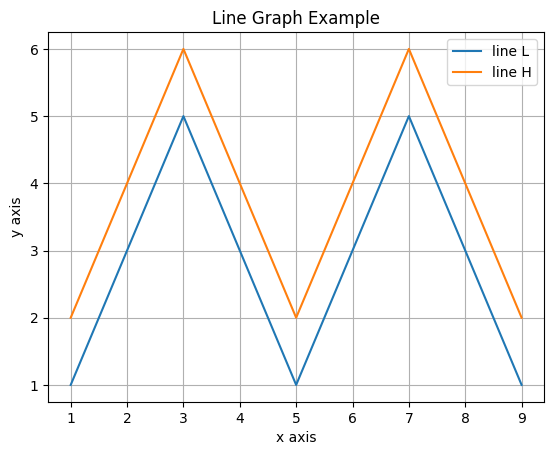

In [ ]:
x  = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y1 = [1, 3, 5, 3, 1, 3, 5, 3, 1]
y2 = [2, 4, 6, 4, 2, 4, 6, 4, 2]
plt.plot(x, y1, label="line L")
plt.plot(x, y2, label="line H")
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.grid()
plt.show()

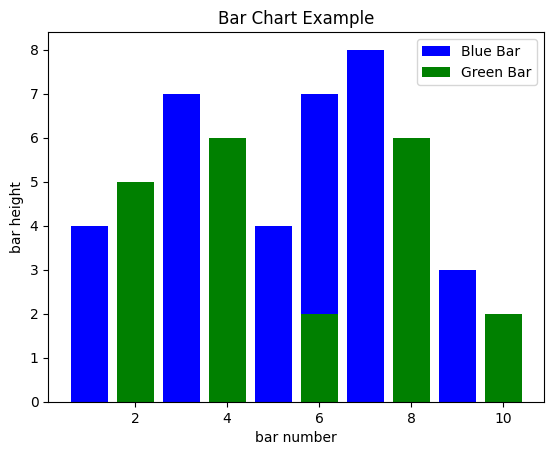

In [ ]:
# Look at index 4 and 6, which demonstrate overlapping cases.
x1 = [1, 3, 4, 5, 6, 7, 9]
y1 = [4, 7, 2, 4, 7, 8, 3]

x2 = [2, 4, 6, 8, 10]
y2 = [5, 6, 2, 6, 2]

# Colors: https://matplotlib.org/api/colors_api.html

plt.bar(x1, y1, label="Blue Bar", color='b')
plt.bar(x2, y2, label="Green Bar", color='g')


plt.xlabel("bar number")
plt.ylabel("bar height")
plt.title("Bar Chart Example")
plt.legend()
plt.show()

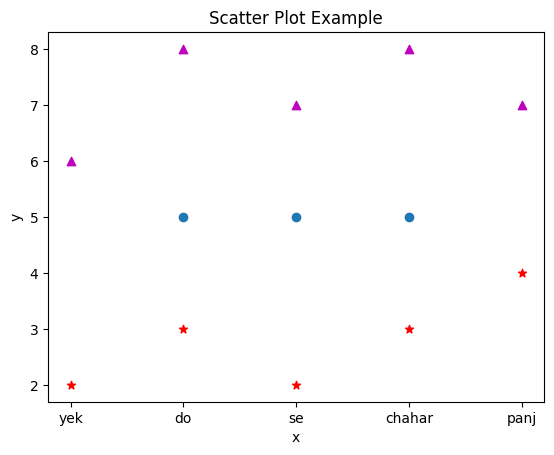

In [ ]:
x1 = [2, 3, 4]
y1 = [5, 5, 5]

x2 = [1, 2, 3, 4, 5]
y2 = [2, 3, 2, 3, 4]
y3 = [6, 8, 7, 8, 7]

# Markers: https://matplotlib.org/api/markers_api.html

plt.scatter(x1, y1)
plt.scatter(x2, y2, marker='*', color='r')
plt.scatter(x2, y3, marker='^', color='m')
plt.xlabel("x")
plt.ylabel("y")
plt.xticks([1, 2, 3, 4, 5], labels=['yek', 'do', 'se', 'chahar', 'panj'])
plt.title('Scatter Plot Example')
# plt.axis('off')
plt.show()

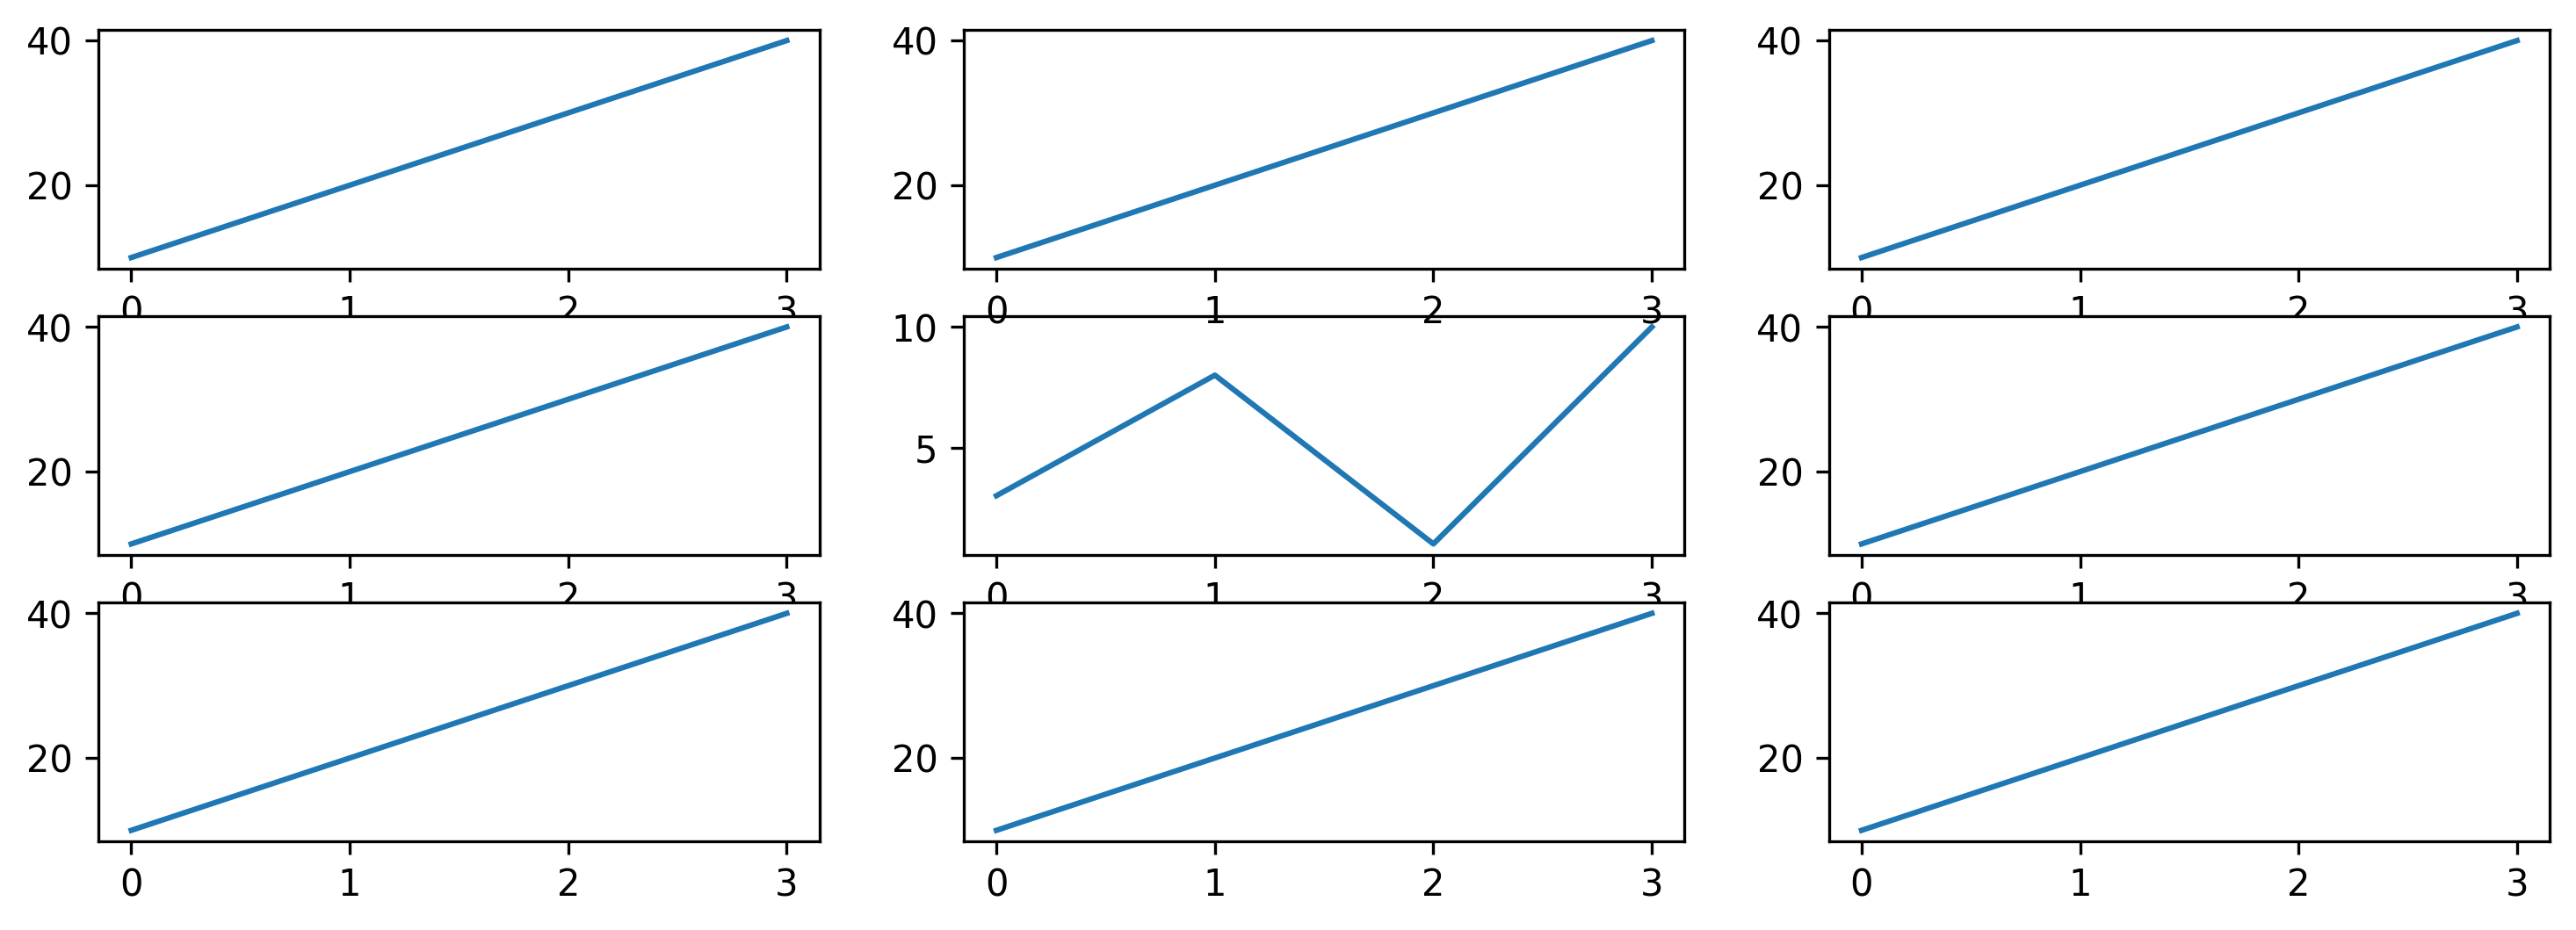

In [ ]:
plt.figure(figsize=(12, 4), dpi=300)
#plot 1:
x = np.array([0, 1, 2, 3])
y = np.array([3, 8, 1, 10])

plt.subplot(3, 3, 5)
plt.plot(x,y)

#plot 2:
x = np.array([0, 1, 2, 3])
y = np.array([10, 20, 30, 40])

plt.subplot(3, 3, 1)
plt.plot(x,y)

plt.subplot(3, 3, 2)
plt.plot(x,y)
plt.subplot(3, 3, 3)
plt.plot(x,y)
plt.subplot(3, 3, 4)
plt.plot(x,y)
plt.subplot(3, 3, 6)
plt.plot(x,y)
plt.subplot(3, 3, 7)
plt.plot(x,y)
plt.subplot(3, 3, 8)
plt.plot(x,y)
plt.subplot(3, 3, 9)
plt.plot(x,y)

plt.savefig('test.png')

# Tasks

<font color='orange'><b>
T1: Preprocessing and training MLP.
</b></font>

The National Health and Nutrition Examination Survey (NHANES) is a study program designed to assess the health and nutritional status of adults and children in the United States. This survey is conducted as a series of interviews focusing on different population groups and health topics. It includes questions on demographics, social, economic, dietary, and health-related topics. In addition to interviews, it includes medical, dental, and physiological measurements, as well as laboratory tests. Since the features of this dataset are encoded, detailed explanations of the meaning of each feature are provided in the ColumnDefinitions file. First, you need to recognize the dataset and become familiar with its variables. The data collection process, existing features, and the relationships between the datasets and their features should be understood. For more understanding of the numerical data meanings for each column in the dataset, you can refer to the following links.

[Demographics](https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=demographic&CycleBeginYear=2013), [Diet](https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=diet&CycleBeginYear=2013), [Examination](https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=examination&CycleBeginYear=2013), [Labs](https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=labs&CycleBeginYear=2013)


**Data Preprocessing:**

One of the most important steps before starting any type of analysis is data preprocessing. Explore your data and gain a complete understanding of its structure and statistical features. Additionally, to achieve better results from many data mining algorithms, it is necessary to make changes or corrections to the raw data. Look for missing values, outliers, and inconsistencies, and apply your strategy to address them. For example, remove columns with more than x% missing values.

**Note:** When the data is not usable or when the patient refuses to respond, combinations of 7 and 9 have been used


**Model Training**
Separate the two datasets obtained in the previous step into training (Train) and testing (Test) sets. Use the training sets to train the regression model on the selected features and target features, namely MCQ220 (Cancer) and MCQ160L (Liver) present in the Questionnaire file to predict the occurrence of these two diseases separately. In this file, the number 1 indicates the presence and the number 2 indicates the absence of the diseases.

**provided dataset**

[Dataset](https://drive.google.com/file/d/13X2vNc7nDBg1n1RU5LT9MbzMY90bPWDR/view?usp=sharing)

Use above file for training an simple MLP.

When you are working with the dataset, there is 2 types of target values: **Cancer** or **Liver**. Choose one of them and train your model on it.

**Notice**: store the processed data for workshop#3

<font color='orange'><b>In this task we're gonna implement an simple MLP with one hidden layer using numpy from scratch. We wrote a program for doing this. You have to complete the *##TODO* sections.
</b></font>

<font color='orange'><b>
For training we will use SGD algorithm as our optimizer.
</b></font>

<font color='orange'><b>
We splitted dataset in the portion of 80 / 20 percent for train and test datasets.
</b></font>

<font color='orange'><b>
For monitoring the overfitting issue, we splitted train dataset to two sections: train and val with a 80 / 20 percent ratio.
</b></font>

<font color='orange'><b>
Our network consists of an input layer, a hidden layer with 10 units and an output layer.
</b></font>

<font color='orange'><b>
Activation functions of this network is sigmoid which you have to implement it.
</b></font>

<font color='orange'><b>
For backpropagation you have to implement the steps in numpy for every layer of this model. Use the concept of this algorithm for implementation.
</b></font>

<font color='orange'><b>
Our loss is BinaryCrossEntropy. You have to implement the loss in numpy and store the result for plotting. Do the same for acc.
</b></font>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import re
import numpy as np

In [29]:
df1 = pd.read_csv('demographic.csv')
df2 = pd.read_csv('diet.csv')
df3 = pd.read_csv('examination.csv')
df4 = pd.read_csv('labs.csv')

In [30]:
# Join the dataframes on suitable column
merged_df_1 = pd.merge(df1, df2, on = 'SEQN')
merged_df_2 = pd.merge(df3, df4, on = 'SEQN')
merged_df = pd.merge(merged_df_1, merged_df_2, on = 'SEQN')

## Exploratory data analysis


Now, we will explore the data to gain insights about the data.

In [31]:
## get some useful info about dataset like: Shape, statistics and some rows of data
merged_df.shape
merged_df.describe()
merged_df.head(10)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1
5,73562,8,2,1,56,NaN,1,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750.0,553.5
6,73563,8,2,1,0,5.0,3,3,2.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,73564,8,2,2,61,NaN,3,3,2.0,NaN,...,0.253,0.0,0.115,0.0,0.0309,0.0,NaN,21.28,668.0,493.0
8,73566,8,2,2,56,NaN,3,3,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378.0,279.0
9,73567,8,2,1,65,NaN,3,3,2.0,NaN,...,0.148,0.0,0.078,0.0,0.0436,0.0,NaN,6.07,194.0,143.2


## DROP columns with fixed values

Drop columns with fixed values (There is just one unique value)

In [32]:
dropcols = merged_df.columns[merged_df.nunique() == 1]
merged_df.drop(columns=dropcols, inplace=True)

## Explore Variables

Treating with NaN values in columns and combination of 7 and 9 as NaN by applying function on each element

In [33]:
def replace_with_nan(element):
  try:
    if re.match(pattern, str(int(element))):
        return np.nan
    return element
  except:
    return element

In [34]:
pattern = r'^7+$'
merged_df = merged_df.applymap(replace_with_nan)

C:\Users\Win\AppData\Local\Temp\ipykernel_28220\3855009962.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_df = merged_df.applymap(replace_with_nan)


In [35]:
pattern = r'^9+$'
merged_df = merged_df.applymap(replace_with_nan)

C:\Users\Win\AppData\Local\Temp\ipykernel_28220\1905811923.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_df = merged_df.applymap(replace_with_nan)


In [36]:
'''
drop columns from the DataFrame merged_df that have 30% of the total number of rows with NAN values.
'''
merged_df = merged_df.dropna(axis = 'columns', thresh=0.7 * merged_df.shape[0])

## Types of variables
In this section, we segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object and int64. Numerical variables have data type float64.

For columns with dtype int64, if our unique values are less than or equal 10, we will take them as categorical otherwise as numerical

First of all, we will find Numerical variables.

In [37]:
categorical = []
numerical = []

for col in merged_df.columns:
    if merged_df[col].dtype =='object':
        categorical.append(col)
    elif merged_df[col].dtype == 'int64':
        if merged_df[col].nunique() <= 10:
            categorical.append(col)
        else:
            numerical.append(col)
    elif merged_df[col].dtype == 'float64':
        numerical.append(col)

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 235 numerical variables

The numerical variables are : ['SEQN', 'RIDAGEYR', 'RIDRETH3', 'RIDEXMON', 'DMDBORN4', 'DMDCITZN', 'SIAPROXY', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHRAGE', 'DMDHRBR4', 'DMDHREDU', 'DMDHRMAR', 'WTINT2YR', 'WTMEC2YR', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR', 'WTDRD1', 'WTDR2D', 'DR1EXMER', 'DRABF', 'DRDINT', 'DR1DBIH', 'DR1LANG', 'DR1MNRSP', 'DR1HELPD', 'DBQ095Z', 'DRQSPREP', 'DR1STY', 'DRQSDIET', 'DR1TNUMF', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL', 'DR1TATOC', 'DR1TATOA', 'DR1TRET', 'DR1TVARA', 'DR1TACAR', 'DR1TBCAR', 'DR1TCRYP', 'DR1TLYCO', 'DR1TLZ', 'DR1TVB1', 'DR1TVB2', 'DR1TNIAC', 'DR1TVB6', 'DR1TFOLA', 'DR1TFA', 'DR1TFF', 'DR1TFDFE', 'DR1TCHL', 'DR1TVB12', 'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TVK', 'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE',

In [38]:
merged_df[numerical].head()

,SEQN,RIDAGEYR,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,SIAPROXY,FIALANG,FIAPROXY,FIAINTRP,...,LBXHBC,LBDHBG,LBDHD,LBDHEG,LBDHEM,LBXTC,LBDTCSI,LBXTTG,URXVOL1,URDFLOW1
0,73557.0,69.0,4.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,167.0,4.32,2.0,87.0,0.821
1,73558.0,54.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,170.0,4.40,2.0,90.0,1.636
2,73559.0,72.0,3.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,126.0,3.26,2.0,66.0,NaN
3,73560.0,NaN,3.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,168.0,4.34,2.0,61.0,0.575
4,73561.0,73.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,201.0,5.20,2.0,5.0,0.109


**Categorical columns**

In [39]:
merged_df[categorical].head()

,RIAGENDR,RIDRETH1,SIALANG,SIAINTRP,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,SDMVPSU,DR1DRSTZ,...,OHX22CTC,OHX23CTC,OHX24CTC,OHX25CTC,OHX26CTC,OHX27CTC,OHX28CTC,OHX29CTC,OHX30CTC,OHX31CTC
0,1,4,1,2,0,0,2,1,1,1,...,P,P,P,P,P,P,P,P,P,P
1,1,3,1,2,0,2,0,1,1,1,...,S,S,S,S,S,S,Z,S,E,E
2,1,3,1,2,0,0,2,1,1,1,...,S,Z,S,S,S,S,S,Z,Z,E
3,1,3,1,2,0,2,0,1,2,1,...,D,S,S,S,S,U,D,D,S,U
4,2,3,1,2,0,0,2,1,2,1,...,S,Z,R,Z,S,Z,E,E,E,E


## Explore Numerical values

In [40]:
merged_df[numerical].isnull().sum()

SEQN           1
RIDAGEYR     463
RIDRETH3     443
RIDEXMON       0
DMDBORN4       4
            ... 
LBXTC       2193
LBDTCSI     2325
LBXTTG      2236
URXVOL1     1869
URDFLOW1    2672
Length: 235, dtype: int64

## Outliers in numerical variables

view summary statistics in numerical variables

In [42]:
print(round(merged_df[numerical].describe()), 2)
def find_outlier_cols(df):
    outlier_cols = []

    # iterate over features(columns)
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Check if any values fall outside of bounds
        if df[(df[col] < lower_bound) | (df[col] > upper_bound)].any(axis=None):
            outlier_cols.append(col)

    return outlier_cols

outlier_cols = find_outlier_cols(merged_df[numerical])
print(outlier_cols)
len(outlier_cols), len(numerical)

          SEQN  RIDAGEYR  RIDRETH3  RIDEXMON  DMDBORN4  DMDCITZN  SIAPROXY  \
count   9812.0    9350.0    9370.0    9813.0    9809.0    9802.0    9812.0   
mean   78645.0      33.0       3.0       2.0       1.0       1.0       2.0   
std     2939.0      24.0       1.0       0.0       0.0       0.0       0.0   
min    73557.0       0.0       1.0       1.0       1.0       1.0       1.0   
25%    76092.0      11.0       2.0       1.0       1.0       1.0       1.0   
50%    78644.0      29.0       3.0       2.0       1.0       1.0       2.0   
75%    81191.0      53.0       4.0       2.0       1.0       1.0       2.0   
max    83731.0      80.0       6.0       2.0       2.0       2.0       2.0   

       FIALANG  FIAPROXY  FIAINTRP  ...  LBXHBC  LBDHBG   LBDHD  LBDHEG  \
count   9712.0    9712.0    9712.0  ...  7656.0  7652.0  7652.0  7656.0   
mean       1.0       2.0       2.0  ...     2.0     2.0     2.0     2.0   
std        0.0       0.0       0.0  ...     0.0     0.0     0.0     0.0 

(202, 235)

Text(0, 0.5, 'HIST')

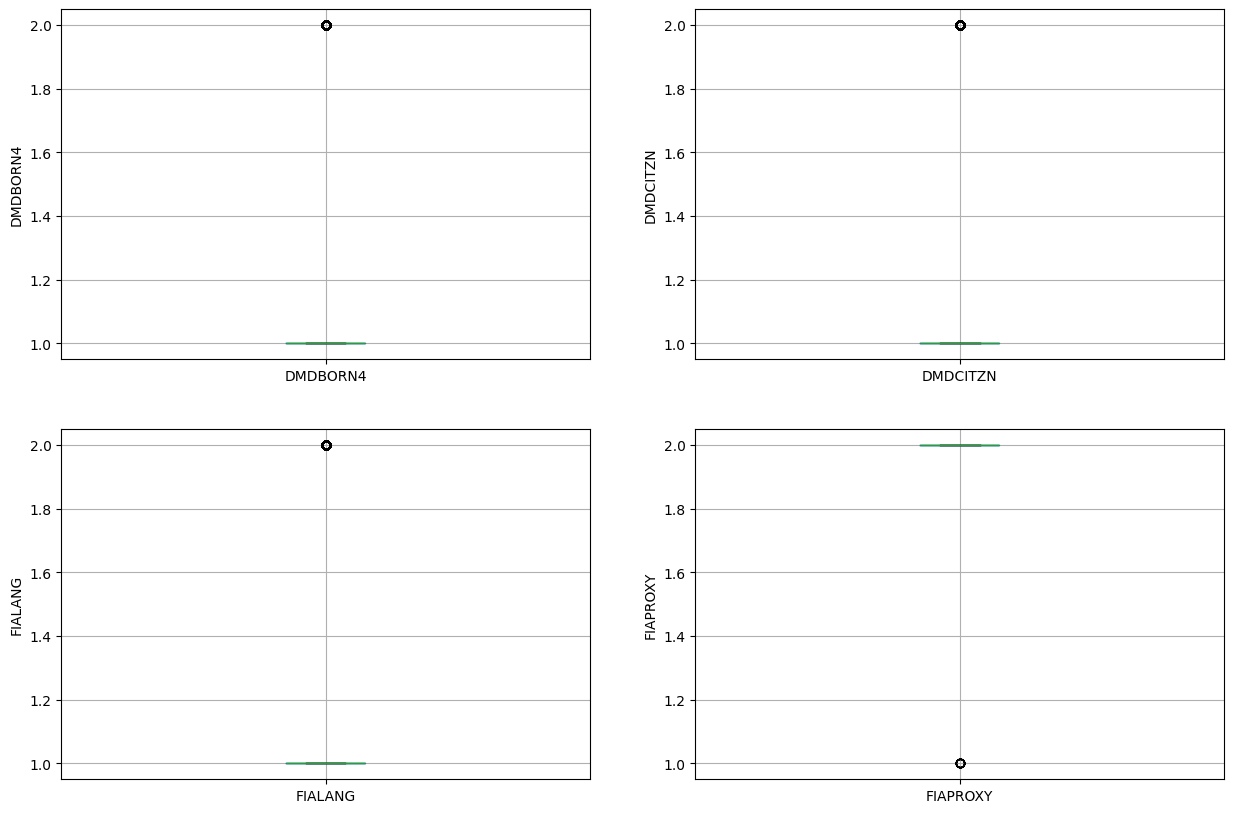

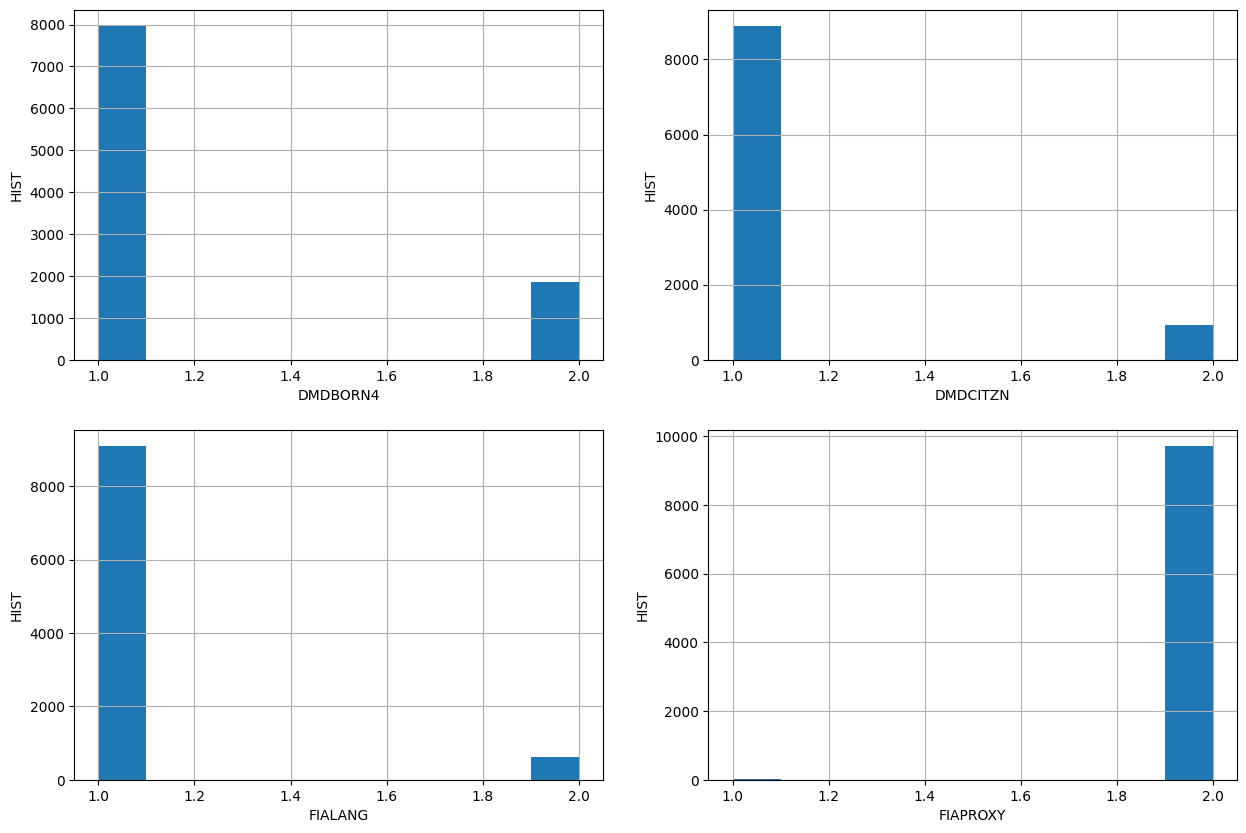

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = merged_df.boxplot(column='DMDBORN4')
fig.set_title('')
fig.set_ylabel('DMDBORN4')


plt.subplot(2, 2, 2)
fig = merged_df.boxplot(column='DMDCITZN')
fig.set_title('')
fig.set_ylabel('DMDCITZN')


plt.subplot(2, 2, 3)
fig = merged_df.boxplot(column='FIALANG')
fig.set_title('')
fig.set_ylabel('FIALANG')


plt.subplot(2, 2, 4)
fig = merged_df.boxplot(column='FIAPROXY')
fig.set_title('')
fig.set_ylabel('FIAPROXY')
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = merged_df.DMDBORN4.hist(bins=10)
fig.set_xlabel('DMDBORN4')
fig.set_ylabel('HIST')


plt.subplot(2, 2, 2)
fig = merged_df.DMDCITZN.hist(bins=10)
fig.set_xlabel('DMDCITZN')
fig.set_ylabel('HIST')


plt.subplot(2, 2, 3)
fig = merged_df.FIALANG.hist(bins=10)
fig.set_xlabel('FIALANG')
fig.set_ylabel('HIST')


plt.subplot(2, 2, 4)
fig = merged_df.FIAPROXY.hist(bins=10)
fig.set_xlabel('FIAPROXY')
fig.set_ylabel('HIST')

## Declare feature vector and target variable

In [44]:
target = pd.read_csv('questionnaire.csv')

Convert combination of 7 and 9 to NaN

In [45]:
pattern = r'^9+$'
target = target.applymap(replace_with_nan)

C:\Users\Win\AppData\Local\Temp\ipykernel_28220\101255036.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  target = target.applymap(replace_with_nan)


In [46]:
pattern = r'^7+$'
target = target.applymap(replace_with_nan)

C:\Users\Win\AppData\Local\Temp\ipykernel_28220\1210207755.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  target = target.applymap(replace_with_nan)


Doing right join to reach same rows in target and data dfs

In [47]:
liver_values = target.merge(merged_df, on='SEQN', how='right')[['SEQN', 'MCQ160L']]
cancer_values = target.merge(merged_df, on='SEQN', how='right')[['SEQN', 'MCQ220']]

In [48]:
target.head()

,SEQN,MCQ160L,MCQ220
0,73557.0,2.0,2.0
1,73558.0,2.0,2.0
2,73559.0,2.0,1.0
3,73560.0,NaN,NaN
4,73561.0,2.0,2.0


In [49]:
merged_df.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,SIALANG,SIAPROXY,...,LBXHBC,LBDHBG,LBDHD,LBDHEG,LBDHEM,LBXTC,LBDTCSI,LBXTTG,URXVOL1,URDFLOW1
0,73557.0,1,69.0,4,4.0,1.0,1.0,1.0,1,2.0,...,1.0,2.0,2.0,2.0,2.0,167.0,4.32,2.0,87.0,0.821
1,73558.0,1,54.0,3,3.0,1.0,1.0,1.0,1,2.0,...,2.0,2.0,2.0,2.0,2.0,170.0,4.40,2.0,90.0,1.636
2,73559.0,1,72.0,3,3.0,2.0,1.0,1.0,1,2.0,...,2.0,2.0,2.0,2.0,2.0,126.0,3.26,2.0,66.0,NaN
3,73560.0,1,NaN,3,3.0,1.0,1.0,1.0,1,1.0,...,2.0,2.0,2.0,2.0,2.0,168.0,4.34,2.0,61.0,0.575
4,73561.0,2,73.0,3,3.0,1.0,1.0,1.0,1,2.0,...,2.0,2.0,2.0,2.0,2.0,201.0,5.20,2.0,5.0,0.109


In [50]:
liver_values.head()

,SEQN,MCQ160L
0,73557.0,2.0
1,73558.0,2.0
2,73559.0,2.0
3,73560.0,NaN
4,73561.0,2.0


In [51]:
cancer_values.head()

,SEQN,MCQ220
0,73557.0,2.0
1,73558.0,2.0
2,73559.0,1.0
3,73560.0,NaN
4,73561.0,2.0


Drop NaN values from target dfs

In [52]:
cancer_values.dropna(subset=['MCQ220'], inplace=True)
liver_values.dropna(subset=['MCQ160L'], inplace=True)

Doing left join to drop the same rows which were dropped in previous step in data dfs

In [53]:
final_liver_data = liver_values.merge(merged_df, on='SEQN', how='left').drop(['SEQN', 'MCQ160L'], axis=1)
final_cancer_data = cancer_values.merge(merged_df, on='SEQN', how='left').drop(['SEQN', 'MCQ220'], axis=1)
cancer_values = cancer_values.drop(['SEQN'], axis=1)
liver_values = liver_values.drop(['SEQN'], axis=1)

## Feature Engineering
**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. We will carry out feature engineering on different types of variables.

First, We will display the categorical and numerical variables again separately.

In [54]:
cancer_categorical = (
    final_cancer_data.select_dtypes(include=["object"]).columns.tolist()
    + final_cancer_data.select_dtypes(include=["int64"])
    .apply(lambda x: x.nunique() <= 10)
    .index.tolist()
)

cancer_numerical = (
    final_cancer_data.select_dtypes(include=["float64"]).columns.tolist()
    + final_cancer_data.select_dtypes(include=["int64"])
    .apply(lambda x: x.nunique() > 10)
    .index.tolist()
)

liver_categorical = (
    final_liver_data.select_dtypes(include=["object"]).columns.tolist()
    + final_liver_data.select_dtypes(include=["int64"])
    .apply(lambda x: x.nunique() <= 10)
    .index.tolist()
)

liver_numerical = (
    final_liver_data.select_dtypes(include=["float64"]).columns.tolist()
    + final_liver_data.select_dtypes(include=["int64"])
    .apply(lambda x: x.nunique() > 10)
    .index.tolist()
)

print(final_cancer_data[cancer_categorical].head())
print(final_liver_data[liver_categorical].head())
print(final_cancer_data[cancer_numerical].head())
print(final_liver_data[liver_numerical].head())

  OHX02CTC OHX03CTC OHX04CTC OHX05CTC OHX06CTC OHX07CTC OHX08CTC OHX09CTC  \
0        P        P        P        P        P        P        P        P   
1        Z        J        S        S        S        S        S        S   
2        Z        Z        Z        S        S        S        S        Z   
3        E        Z        E        Z        Z        Z        R        R   
4        Z        Z        R        Z        R        R        Y        Y   

  OHX10CTC OHX11CTC  ... SIAINTRP DMDHHSZA DMDHHSZB DMDHHSZE DMDHRGND SDMVPSU  \
0        P        P  ...        2        0        0        2        1       1   
1        S        S  ...        2        0        2        0        1       1   
2        S        S  ...        2        0        0        2        1       1   
3        Z        Z  ...        2        0        0        2        1       2   
4        Y        Y  ...        2        0        0        0        1       1   

  SDMVSTRA DR1DRSTZ PEASCST1 BMDSTATS  
0      112

## Engineering missing values in numerical variables

**Assumption**

We assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, we will use median imputation because median imputation is robust to outliers.

We will impute missing values with the appropriate statistical measures of the data, in this case median.

In [55]:
for col in cancer_numerical:
    col_median = final_cancer_data[col].median()
    final_cancer_data.fillna({col:col_median}, inplace=True)
for col in liver_numerical:
    col_median = final_liver_data[col].median()
    final_liver_data.fillna({col:col_median}, inplace=True)
print(final_cancer_data[cancer_numerical].isnull().sum())
print(final_liver_data[liver_numerical].isnull().sum())

RIDAGEYR    0
RIDRETH3    0
RIDEXMON    0
DMDBORN4    0
DMDCITZN    0
           ..
SDMVPSU     0
SDMVSTRA    0
DR1DRSTZ    0
PEASCST1    0
BMDSTATS    0
Length: 246, dtype: int64
RIDAGEYR    0
RIDRETH3    0
RIDEXMON    0
DMDBORN4    0
DMDCITZN    0
           ..
SDMVPSU     0
SDMVSTRA    0
DR1DRSTZ    0
PEASCST1    0
BMDSTATS    0
Length: 246, dtype: int64


## Engineering missing values in categorical variables

We will impute missing categorical variables with most frequent value

In [56]:
for col in cancer_categorical:
    col_mode = final_cancer_data[col].value_counts().idxmax()
    final_cancer_data.fillna({col: col_mode}, inplace=True)
for col in liver_categorical:
    col_mode = final_liver_data[col].value_counts().idxmax()
    final_liver_data.fillna({col: col_mode}, inplace=True)
print(final_cancer_data[cancer_categorical].isnull().sum())
print(final_liver_data[liver_categorical].isnull().sum())

OHX02CTC    0
OHX03CTC    0
OHX04CTC    0
OHX05CTC    0
OHX06CTC    0
OHX07CTC    0
OHX08CTC    0
OHX09CTC    0
OHX10CTC    0
OHX11CTC    0
OHX12CTC    0
OHX13CTC    0
OHX14CTC    0
OHX15CTC    0
OHX18CTC    0
OHX19CTC    0
OHX20CTC    0
OHX21CTC    0
OHX22CTC    0
OHX23CTC    0
OHX24CTC    0
OHX25CTC    0
OHX26CTC    0
OHX27CTC    0
OHX28CTC    0
OHX29CTC    0
OHX30CTC    0
OHX31CTC    0
RIAGENDR    0
RIDRETH1    0
SIALANG     0
SIAINTRP    0
DMDHHSZA    0
DMDHHSZB    0
DMDHHSZE    0
DMDHRGND    0
SDMVPSU     0
SDMVSTRA    0
DR1DRSTZ    0
PEASCST1    0
BMDSTATS    0
dtype: int64
OHX02CTC    0
OHX03CTC    0
OHX04CTC    0
OHX05CTC    0
OHX06CTC    0
OHX07CTC    0
OHX08CTC    0
OHX09CTC    0
OHX10CTC    0
OHX11CTC    0
OHX12CTC    0
OHX13CTC    0
OHX14CTC    0
OHX15CTC    0
OHX18CTC    0
OHX19CTC    0
OHX20CTC    0
OHX21CTC    0
OHX22CTC    0
OHX23CTC    0
OHX24CTC    0
OHX25CTC    0
OHX26CTC    0
OHX27CTC    0
OHX28CTC    0
OHX29CTC    0
OHX30CTC    0
OHX31CTC    0
RIAGENDR    0
RIDRETH

## Dummies the categorical cols
**Cancer Data**

In [57]:
final_cancer_data = pd.get_dummies(final_cancer_data, columns=cancer_categorical)

**Liver Data**

In [58]:
final_liver_data = pd.get_dummies(final_liver_data, columns=liver_categorical)

## Feature selection

computing correlation coefficient

In [59]:
cancer_corr_matrix = final_cancer_data.corr()
liver_corr_matrix = final_liver_data.corr()

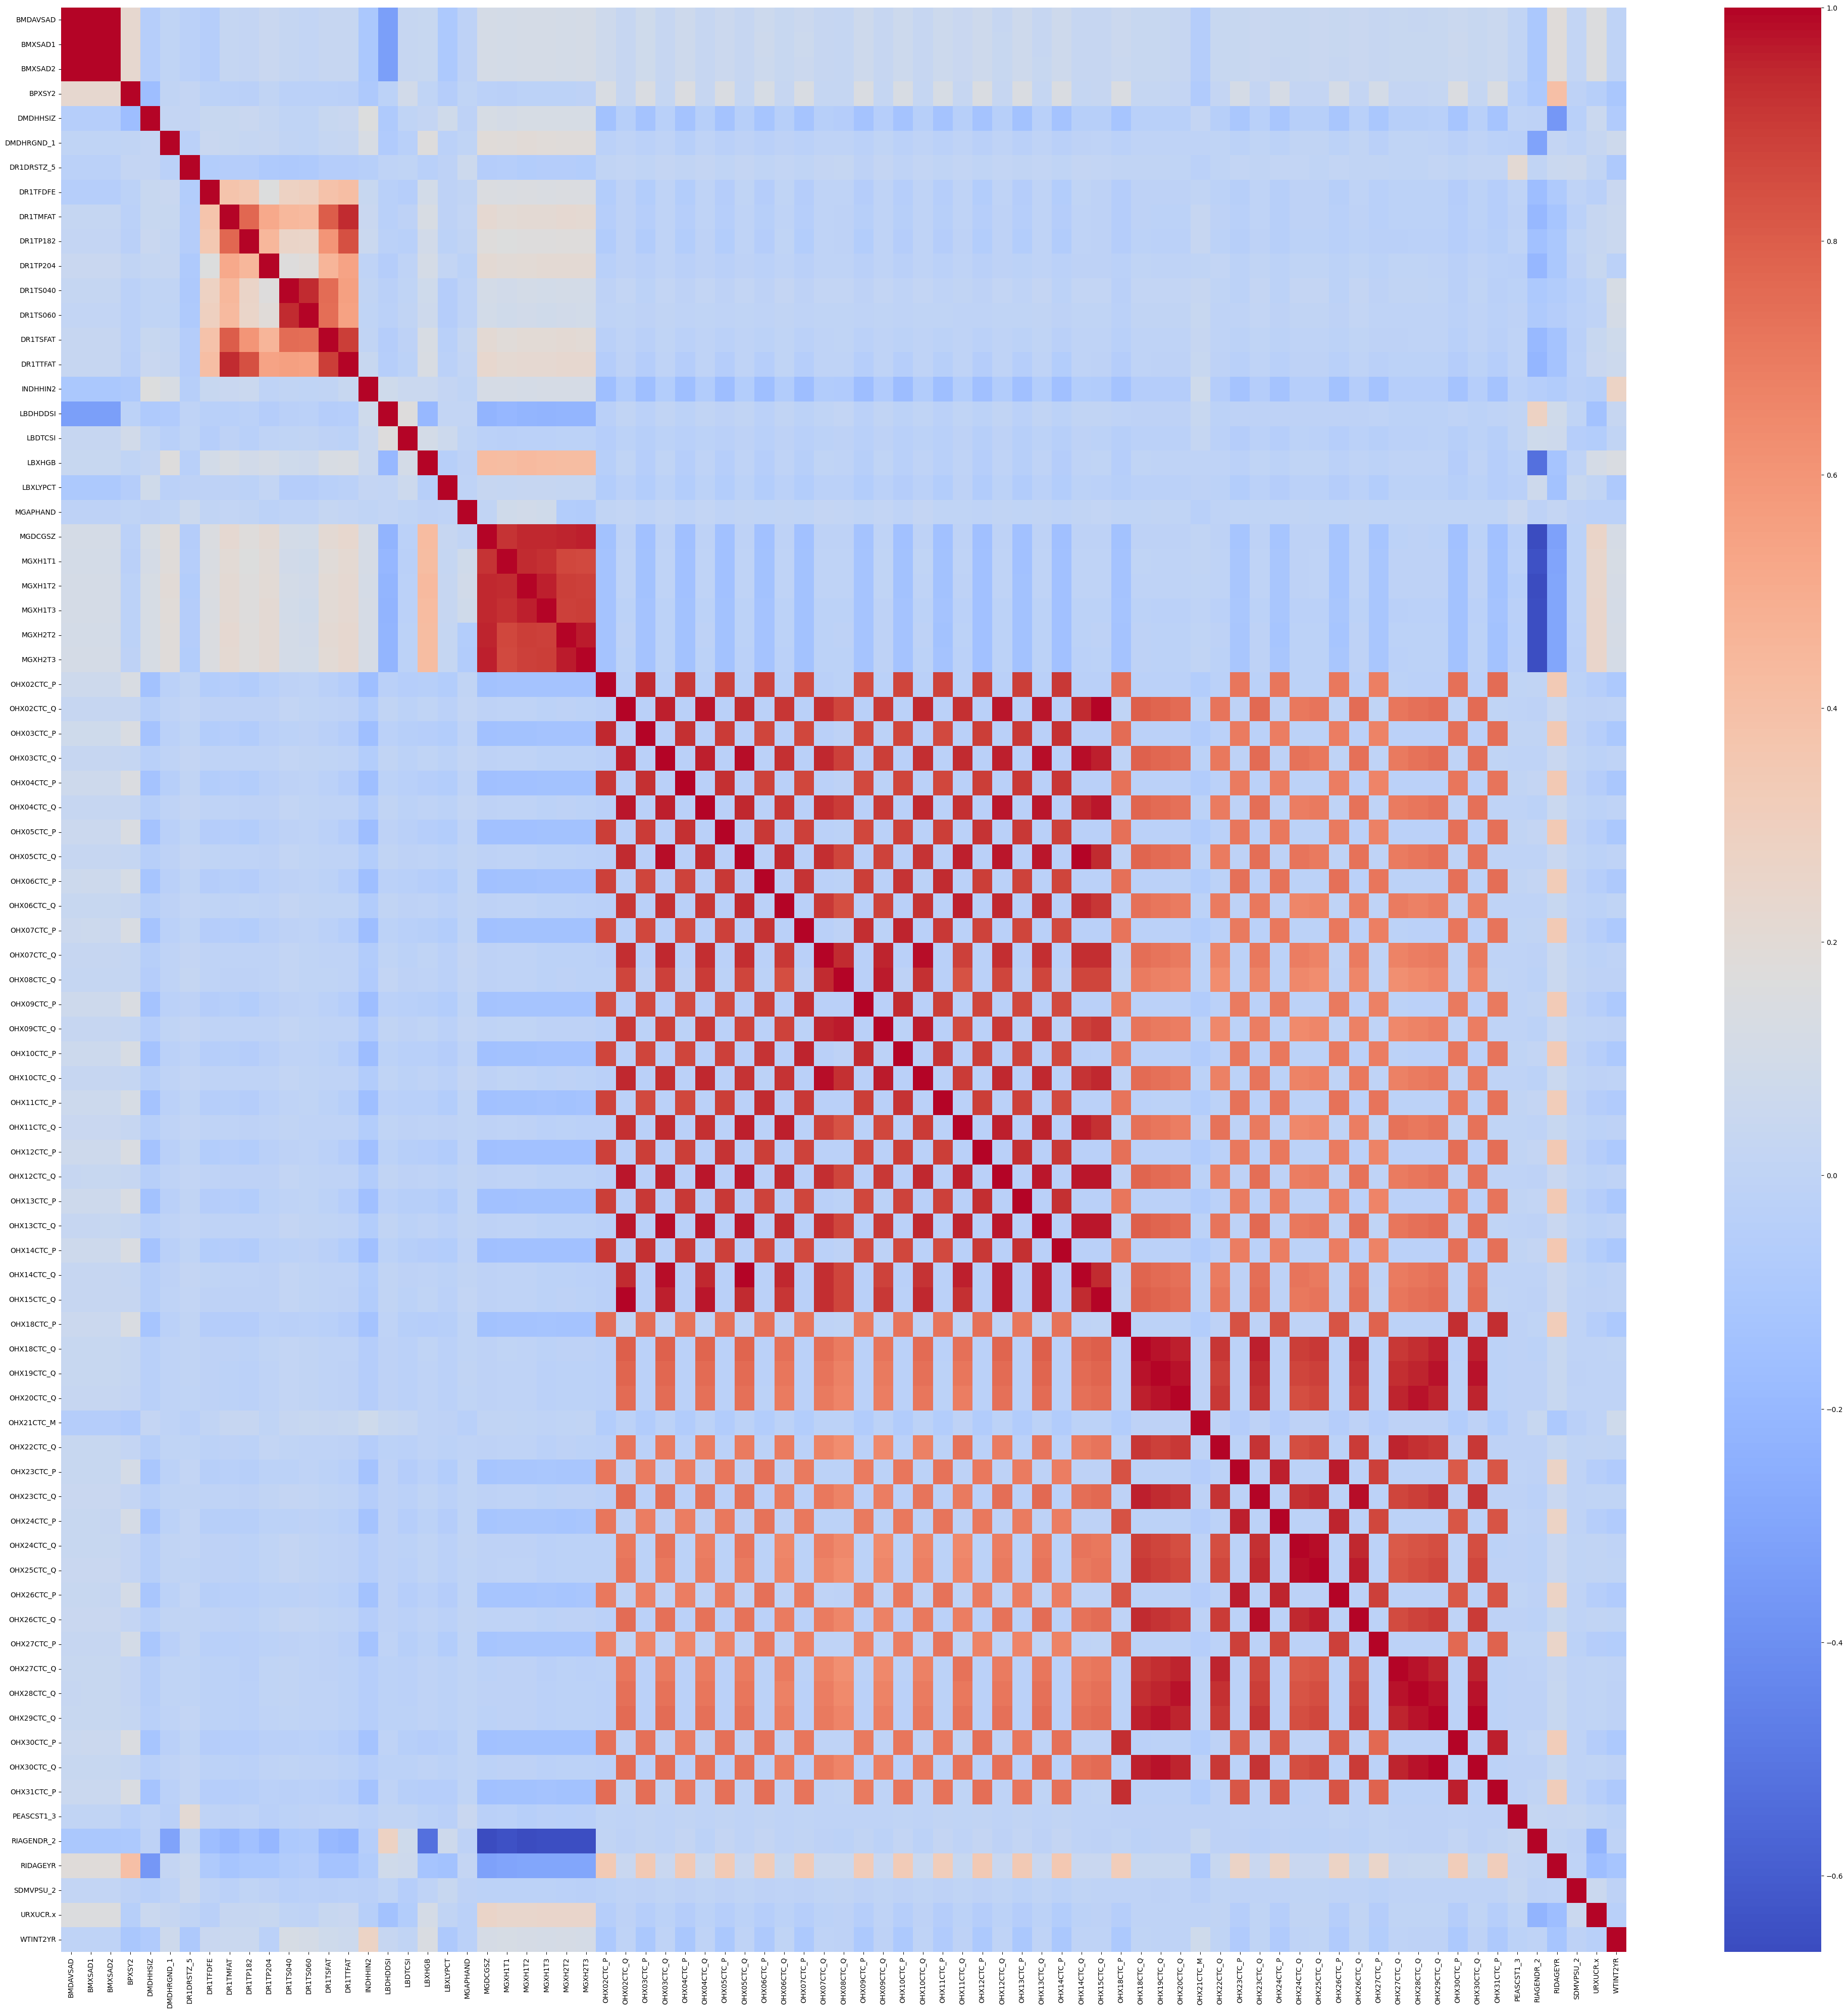

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

abs_corr_matrix = np.abs(cancer_corr_matrix)
cancer_corr_pairs = abs_corr_matrix.unstack().sort_values(ascending=False)
top_pairs = cancer_corr_pairs[:1000]
unique_pairs = top_pairs.drop_duplicates()
top_columns = np.unique([col for col, _ in unique_pairs.keys()])
top_corr_matrix = final_cancer_data[top_columns].corr()
plt.figure(figsize=(50, 50))
sns.heatmap(top_corr_matrix, annot=False, cmap='coolwarm')
plt.show()

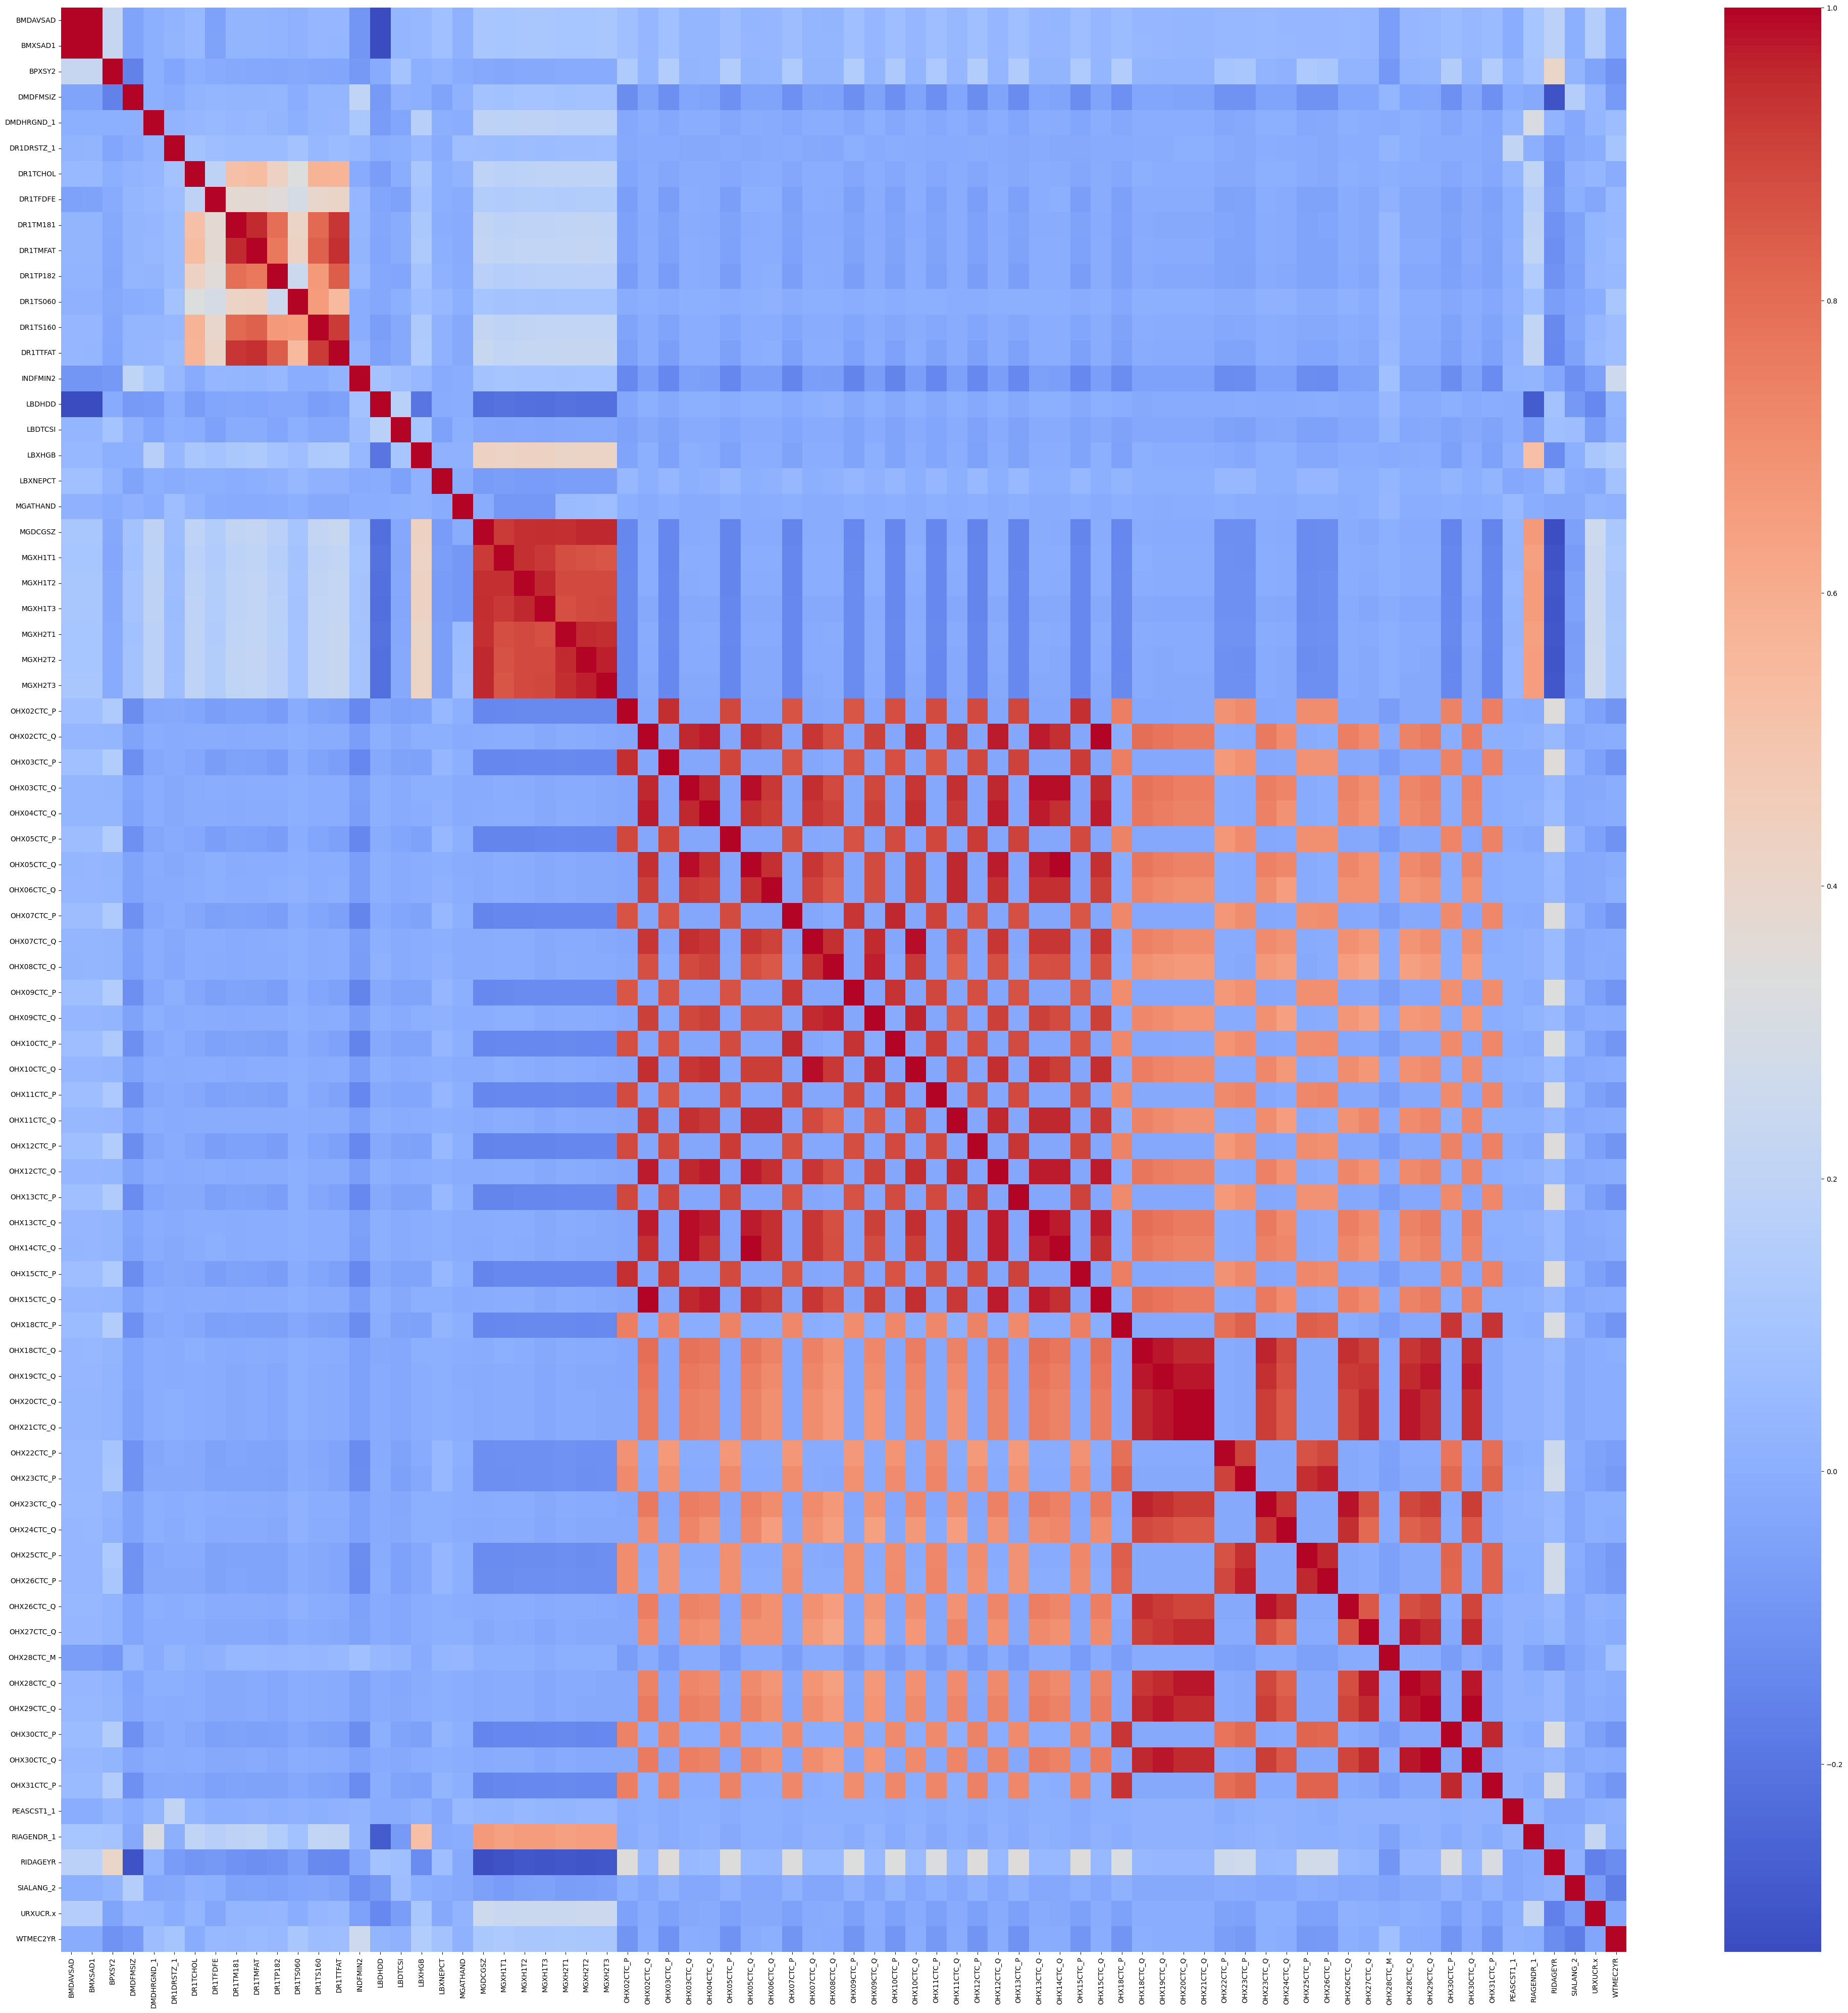

In [61]:
abs_corr_matrix = np.abs(liver_corr_matrix)
liver_corr_pairs = abs_corr_matrix.unstack().sort_values(ascending=False)
top_pairs = liver_corr_pairs[:1000]
unique_pairs = top_pairs.drop_duplicates()
top_columns = np.unique([col for col, _ in unique_pairs.keys()])
top_corr_matrix = final_liver_data[top_columns].corr()
plt.figure(figsize=(50, 50))
sns.heatmap(top_corr_matrix, annot=False, cmap='coolwarm')
plt.show()

Selecting 150 features from original features according to their correlation coefficient

**Cancer**

In [74]:
import random

# Set your correlation threshold
threshold = 0.8

# Get pairs with correlation higher than threshold
high_corr_pairs = cancer_corr_matrix.abs().stack().reset_index()
high_corr_pairs.columns = ["f1", "f2", "corr"]
high_corr_pairs = high_corr_pairs[
    (high_corr_pairs["corr"] > 0.8) & (high_corr_pairs["f1"] != high_corr_pairs["f2"])
]

# Initialize an empty set to hold the selected features
selected_features = set()

pairs = list(zip(high_corr_pairs["f1"], high_corr_pairs["f2"]))

# Loop through the high correlation pairs
for pair in pairs:
    # Randomly select one feature from the pair
    selected_feature = random.choice(pair)
    # Add the selected feature to the set
    selected_features.add(selected_feature)
    # If we've selected 150 features, stop selecting
    if len(selected_features) == 150:
        break

# If less than 150 features were selected, print a warning
if len(selected_features) < 150:
    print(
        f"Warning: Only {len(selected_features)} features were selected. Consider lowering the threshold."
    )

# Create a new DataFrame with only the selected features
selected_cancer_df = final_cancer_data[list(selected_features)]

**Liver**

In [75]:
# Set your correlation threshold
threshold = 0.8

# Get pairs with correlation higher than threshold
high_corr_pairs = liver_corr_matrix.abs().stack().reset_index()
high_corr_pairs.columns = ["f1", "f2", "corr"]
high_corr_pairs = high_corr_pairs[
    (high_corr_pairs["corr"] > 0.8) & (high_corr_pairs["f1"] != high_corr_pairs["f2"])
]

# Initialize an empty set to hold the selected features
selected_features = set()

pairs = list(zip(high_corr_pairs["f1"], high_corr_pairs["f2"]))

# Loop through the high correlation pairs
for pair in pairs:
    # Randomly select one feature from the pair
    selected_feature = random.choice(pair)
    # Add the selected feature to the set
    selected_features.add(selected_feature)
    # If we've selected 150 features, stop selecting
    if len(selected_features) == 150:
        break

# If less than 150 features were selected, print a warning
if len(selected_features) < 150:
    print(
        f"Warning: Only {len(selected_features)} features were selected. Consider lowering the threshold."
    )

# Create a new DataFrame with only the selected features
selected_liver_df = final_liver_data[list(selected_features)]

In [76]:
print(selected_cancer_df.head())
print(selected_liver_df.head())

   OHX02CTC_P  DR1TP204  OHX11TC  DR1TTFAT  OHX03CTC_P  OHDEXSTS  DR1TS160  \
0        True     0.094      4.0     52.81        True       1.0   13.5075   
1       False     0.728      2.0    124.29       False       1.0   27.9520   
2       False     0.042      2.0     65.97       False       1.0   10.6910   
3       False     0.000      2.0     55.36       False       1.0    1.5060   
4       False     0.262      2.0     93.92       False       1.0   15.0650   

   OHX10CTC_Q  OHX07CTC_P  DR1TKCAL  ...  DR1TS100  OHX24CTC_P  OHX31CTC_P  \
0       False        True    1574.0  ...     0.153        True        True   
1       False       False    5062.0  ...     1.286       False       False   
2       False       False    1743.0  ...     0.455       False       False   
3       False       False    1421.0  ...     0.008       False       False   
4       False       False    1785.0  ...     0.180       False       False   

   BMXSAD2  OHX14CTC_P  OHX19CTC_P  DR1TCHOL  DR1TSELE  DR1TFO

## Scale and PCA
We will use zero-mean scaler to normalize the data

In [77]:
from sklearn.preprocessing import StandardScaler

cols = selected_liver_df.columns
scaler = StandardScaler()

selected_liver_df = scaler.fit_transform(selected_liver_df)
selected_liver_df = pd.DataFrame(selected_liver_df, columns=[cols])

cols = selected_cancer_df.columns
scaler = StandardScaler()

selected_cancer_df = scaler.fit_transform(selected_cancer_df)
selected_cancer_df = pd.DataFrame(selected_cancer_df, columns=[cols])

In [78]:
from sklearn.decomposition import PCA

pca = PCA(0.90)
cancerprincipalComponents = pca.fit_transform(selected_cancer_df)

cancerprincipalDf = pd.DataFrame(data=cancerprincipalComponents,
                           columns=['Principal Component ' + str(i) for i in range(1, cancerprincipalComponents.shape[1] + 1)])
cancerprincipalDf.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 27,Principal Component 28,Principal Component 29,Principal Component 30,Principal Component 31,Principal Component 32,Principal Component 33,Principal Component 34,Principal Component 35,Principal Component 36
0,18.656523,-3.303366,-0.449799,-0.482666,1.749002,-2.254572,0.172962,-0.655701,-1.120870,-0.154535,...,-0.021664,0.558883,-0.902378,0.034645,0.551290,-0.528161,0.072955,1.089013,0.545546,0.509194
1,-3.386225,0.249985,13.564090,-3.500495,-4.514736,2.995472,4.881857,0.183982,5.414294,-2.347959,...,0.745165,0.392687,0.288828,-0.052940,-2.455731,-1.628757,2.566336,-0.448611,0.585347,0.659602
2,-1.880247,0.020945,-0.553698,3.730405,1.738438,1.098259,0.813530,0.328164,-1.220862,0.553014,...,0.881772,-0.868939,0.415632,-0.903401,0.518571,-0.057230,-0.451869,-0.420201,0.419580,-0.050215
3,0.712008,-0.079586,-4.953706,-2.608802,-1.441504,1.823679,2.164627,0.832598,-0.607609,0.048343,...,0.387726,-0.319816,-0.207184,-1.378222,-0.243554,1.359063,-0.799078,-0.833569,0.340401,-1.285950
4,0.624998,0.155234,-0.169422,2.890182,-4.704715,1.526894,2.501226,0.224077,-0.418964,-0.206708,...,0.377533,-0.368481,-0.069957,0.027275,0.855845,0.386927,-0.920376,-0.845112,-0.168956,-1.702389


In [79]:
pca = PCA(0.90)
liverprincipalComponents = pca.fit_transform(selected_liver_df)

liverprincipalDf = pd.DataFrame(data=liverprincipalComponents,
                           columns=['Principal Component ' + str(i) for i in range(1, liverprincipalComponents.shape[1] + 1)])
liverprincipalDf.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 26,Principal Component 27,Principal Component 28,Principal Component 29,Principal Component 30,Principal Component 31,Principal Component 32,Principal Component 33,Principal Component 34,Principal Component 35
0,17.841391,-2.637574,-0.449716,-0.347658,1.652542,-0.222871,-0.552897,-0.688693,-0.448890,1.215111,...,1.132970,-0.990201,1.312373,1.016100,0.219923,-0.087743,-0.624372,0.518133,0.763899,0.279464
1,-3.482195,0.426270,14.087656,-3.983933,-4.766802,2.381723,7.836848,-5.103374,2.669938,-0.867479,...,-0.428860,-1.255999,0.978655,0.637126,-0.092112,-2.735154,0.212957,-1.142814,-0.856751,-1.295920
2,-2.151685,-0.010830,-0.585194,3.539864,1.841653,0.311851,-0.127902,2.839880,0.847064,0.045304,...,0.622691,-0.571756,0.833299,1.108603,0.139577,0.018253,-0.665520,0.218756,-0.332181,0.357737
3,0.757696,-0.119062,-5.066468,-2.350553,-1.340398,1.125735,1.310596,3.399666,2.778588,1.274214,...,0.125408,-0.714547,-0.109292,1.263881,0.377968,-0.186346,-0.937906,-0.249165,0.042039,0.869448
4,1.045825,0.297651,-0.004351,3.393295,-4.622746,1.297892,2.373425,1.379129,1.283690,2.087111,...,-1.724709,0.035393,0.665756,0.815152,-0.022897,0.812374,-0.377663,-0.863041,0.971668,-0.822437


**Convert model labels to 0 and 1**

In [80]:
cancer_values['MCQ220'] = cancer_values['MCQ220'].apply(lambda x : 0 if int(x) == 2 else 1)
cancer_values.head()

,MCQ220
0,0
1,0
2,1
4,0
5,0


In [81]:
liver_values['MCQ160L'] = liver_values['MCQ160L'].apply(lambda x : 0 if int(x) == 2 else 1)
liver_values.head()

,MCQ160L
0,0
1,0
2,0
4,0
5,0


## Train Test Split

In [82]:
from sklearn.model_selection import train_test_split

cancer_x_train, cancer_x_test, cancer_y_train, cancer_y_test = train_test_split(cancerprincipalDf, cancer_values, test_size = 0.2, random_state = 0)
liver_x_train, liver_x_test, liver_y_train, liver_y_test = train_test_split(liverprincipalDf, liver_values, test_size = 0.2, random_state = 0)
cancer_x_train.shape, cancer_x_test.shape, liver_x_train.shape, liver_x_test.shape

((4470, 36), (1118, 36), (4463, 35), (1116, 35))

Because the dataset is imbalance, so we use the sampling techniques

In [83]:
from imblearn.under_sampling import RandomUnderSampler

# Under-sampling for liver dataset
rus = RandomUnderSampler(random_state=0)
liver_x_resampled, liver_y_resampled = rus.fit_resample(liver_x_train, liver_y_train)

# Under-sampling for cancer dataset
rus = RandomUnderSampler(random_state=0)
cancer_x_resampled, cancer_y_resampled = rus.fit_resample(cancer_x_train, cancer_y_train)

In [92]:
cancer_x_test.to_csv('cancer_x_test.csv')
cancer_y_test.to_csv('cancer_y_test.csv')
cancer_x_resampled.to_csv('cancer_x_resampled.csv')
cancer_y_resampled.to_csv('cancer_y_resampled.csv')

Epoch 10/100, Train Loss: -1.0490, Train Acc: 0.5062, Val Loss: -1.0591, Val Acc: 0.4753
Epoch 20/100, Train Loss: -1.0494, Train Acc: 0.5062, Val Loss: -1.0585, Val Acc: 0.4753
Epoch 30/100, Train Loss: -1.0500, Train Acc: 0.5062, Val Loss: -1.0578, Val Acc: 0.4753
Epoch 40/100, Train Loss: -1.0482, Train Acc: 0.7245, Val Loss: -1.0552, Val Acc: 0.7037
Epoch 50/100, Train Loss: -1.0452, Train Acc: 0.7384, Val Loss: -1.0525, Val Acc: 0.7160
Epoch 60/100, Train Loss: -1.0428, Train Acc: 0.7446, Val Loss: -1.0487, Val Acc: 0.7160
Epoch 70/100, Train Loss: -1.0405, Train Acc: 0.7415, Val Loss: -1.0446, Val Acc: 0.7099
Epoch 80/100, Train Loss: -1.0381, Train Acc: 0.7415, Val Loss: -1.0406, Val Acc: 0.7099
Epoch 90/100, Train Loss: -1.0355, Train Acc: 0.7399, Val Loss: -1.0373, Val Acc: 0.7099
Epoch 100/100, Train Loss: -1.0334, Train Acc: 0.7384, Val Loss: -1.0348, Val Acc: 0.7160


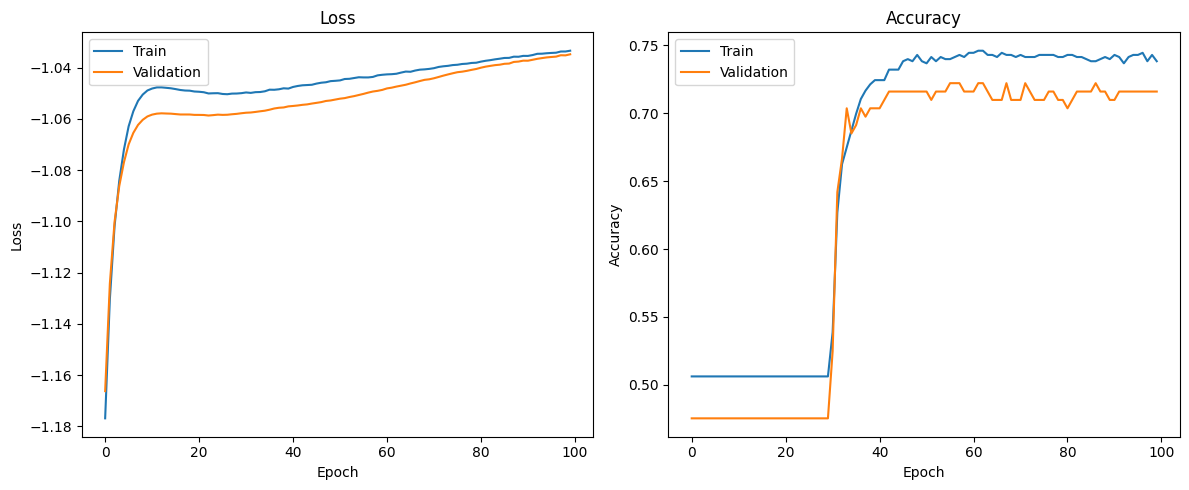

Test Loss: -1.0074, Test Accuracy: 0.6512

Example predictions:
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
True: 0, Predicted: 0
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
True: 0, Predicted: 0
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
True: 0, Predicted: 0
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
True: 0, Predicted: 0
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
True: 0, Predicted: 0


In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


class DataPreprocessor:
    def __init__(self, x_train, y_train, x_test, y_test):
        """
        initiate X and y with resampled values
        initiate X_test and y_test with test values
        """
        self.X = np.array(x_train)
        self.y = np.array(y_train)
        self.X_test = np.array(x_test)
        self.y_test = np.array(y_test)

    def preprocess(self):
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )


class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initiate weights with random normal numbers. with mean=0 and std=0.01. you need 2 weight matrices.
        from input2hidden and from hidden2output.
        Initiate biase vectors with zeros.
        """
        self.weights1 = np.random.normal(
            loc=0, scale=0.01, size=(input_size, hidden_size)
        )
        self.bias1 = np.zeros(shape=(hidden_size,1))
        self.weights2 = np.random.normal(
            loc=0, scale=0.01, size=(hidden_size, output_size)
        )
        self.bias2 = np.zeros(shape=(output_size,1))

    def sigmoid(self, x):
        """
        Implement the sigmoid function.
        """
        return 1 / (1 + np.exp(-1 * x))

    def sigmoid_derivative(self, x):
        """
        Implement the derivative of sigmoid function.
        """
        sigmoid = self.sigmoid(x)
        return sigmoid * (1 - sigmoid)

    def forward(self, X):
        """
        Do the forward phase. In this phase first propagate inputs through weights and sum up with biases.
        Then pass the results through activation function.
        """
        self.z1 = np.matmul(self.weights1.T, X) + self.bias1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.matmul(self.weights2.T, self.a1) + self.bias2
        self.a2 = self.sigmoid(self.z2)
        return self.sigmoid(self.a2)

    def backward(self, X, y, output, learning_rate):
        """
        steps:
        1. The error term for the output layer: calculated as the difference between the predicted output and the true labels (dz2).
        2. Gradients for Output Layer Weights and Biases: gradient of the loss with respect to the weights and biases of the output layer (dw2, db2).
        3. Hidden layer error calculation: calculated by propagating the error back through the weights of the output layer
                                           and applying the derivative of the activation function (dz1).
        4. Gradients for Hidden Layer Weights and Biases: gradient of the loss with respect to the weights and biases of the hidden layer (dw1, db1).
        5. Updating Weights and Biases.
        """
        m = X.shape[0]

        dz2 = output - y

        dw2 = np.dot(self.a1, dz2.T) / m
        db2 = np.sum(dz2, axis=1, keepdims=True) / m

        dz1 = np.dot(self.weights2, dz2) * self.sigmoid_derivative(self.z1)
        dw1 = np.dot(X, dz1.T) / m
        db1 = np.sum(dz1, axis=1, keepdims=True) / m

        self.weights2 -= learning_rate * dw2
        self.bias2 -= learning_rate * db2

        self.weights1 -= learning_rate * dw1
        self.bias1 -= learning_rate * db1


def _compute_loss(output, y):
    m = y.shape[1]
    loss = -1 / m * np.sum(y * np.log(output) + 1 - y * np.log(1 - output))
    return loss


def _compute_accuracy(output, y):
    predictions = output > 0.5
    accuracy = np.mean(predictions == y)
    return accuracy


class Trainer:
    def __init__(
        self,
        model,
        X_train,
        y_train,
        X_val,
        y_val,
        epochs=100,
        learning_rate=0.1,
        batch_size=32,
    ):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.train_losses = []
        self.train_accuracies = []
        self.val_losses = []
        self.val_accuracies = []

    def train(self):
        m = self.X_train.shape[0]

        for epoch in range(self.epochs):
            # Shuffle the training data
            indices = np.random.permutation(m)
            X_shuffled = self.X_train[indices]
            y_shuffled = self.y_train[indices]
            for i in range(0, m, self.batch_size):
                ## get the current batch data and calculate the model output. Then update the weights and biases.
                X_batch = X_shuffled[i : i + self.batch_size]
                y_batch = y_shuffled[i : i + self.batch_size]

                output = self.model.forward(X_batch.T)
                self.model.backward(X_batch.T, y_batch.T, output, self.learning_rate)

            # Calculate train loss (BinaryCrossEntropy) and accuracy (over 0.5 is 1 else is 0)
            train_output = self.model.forward(self.X_train.T)
            train_loss = _compute_loss(train_output, self.y_train.T)
            train_accuracy = _compute_accuracy(train_output, self.y_train.T)

            # Calculate validation loss and accuracy
            val_output = self.model.forward(self.X_val.T)
            val_loss = _compute_loss(val_output, self.y_val.T)
            val_accuracy = _compute_accuracy(val_output, self.y_val.T)

            self.train_losses.append(train_loss)
            self.train_accuracies.append(train_accuracy)
            self.val_losses.append(val_loss)
            self.val_accuracies.append(val_accuracy)

            if (epoch + 1) % 10 == 0:
                print(
                    f"Epoch {epoch+1}/{self.epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}"
                )

    def plot_results(self):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(self.train_losses, label="Train")
        plt.plot(self.val_losses, label="Validation")
        plt.title("Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(self.train_accuracies, label="Train")
        plt.plot(self.val_accuracies, label="Validation")
        plt.title("Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()

        plt.tight_layout()
        plt.show()


class Tester:
    def __init__(self, model, X_test, y_test):
        self.model = model
        self.X_test = X_test
        self.y_test = y_test

    def test(self):
        """
        first forward the test data in the trained model
        then compute the BCE
        then binary acc.
        """
        test_output = self.model.forward(self.X_test.T)
        test_loss = _compute_loss(test_output, self.y_test.T)
        test_accuracy = _compute_accuracy(test_output, self.y_test.T)

        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

        return test_output


# Main execution
if __name__ == "__main__":
    # Preprocess data
    preprocessor = DataPreprocessor(
        cancer_x_resampled, cancer_y_resampled, cancer_x_test, cancer_y_test
    )
    preprocessor.preprocess()

    # Initialize and train model
    input_size = preprocessor.X_train.shape[1]
    hidden_size = 10
    output_size = 1

    model = MLP(input_size, hidden_size, output_size)
    trainer = Trainer(
        model,
        preprocessor.X_train,
        preprocessor.y_train,
        preprocessor.X_val,
        preprocessor.y_val,
        epochs=100,
        learning_rate=0.1,
        batch_size=32,
    )
    trainer.train()

    # Plot results
    trainer.plot_results()

    # Test the model
    tester = Tester(model, preprocessor.X_test, preprocessor.y_test)
    test_output = tester.test()

    print("\nExample predictions:")

    for i in range(5):
        print(preprocessor.y_test)
        true_label = np.argmax(preprocessor.y_test[i])
        predicted_label = np.argmax(test_output[:,i])
        print(f"True: {true_label}, Predicted: {predicted_label}")